https://www.kaggle.com/code/pavanyeluri/amcat-employability-outcome-eda

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

In [2]:
# Loading the excel data
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

In [3]:
# Head of the data
df.head(5)

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3   
1         assistant manager     Indore      m 1989-10-04          85.4   
2          systems engineer    Chennai      f 1992-08-03          85.0   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6   
4                       get    Manesar      m 1991-02-27          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

In [4]:
# Lets check the sample of the given data
df.sample(5)

Unnamed: 0       ID  Salary        DOJ                  DOL  \
2134      train   602029  150000 2014-10-01  2015-09-01 00:00:00   
1507      train   827775  325000 2014-07-01              present   
2918      train   138359  335000 2011-01-01  2014-12-01 00:00:00   
481       train  1055284  120000 2014-04-01  2015-01-01 00:00:00   
2750      train   362798  365000 2013-03-01              present   

                    Designation     JobCity Gender        DOB  10percentage  \
2134  trainee software engineer          -1      m 1991-03-28          70.3   
1507            system engineer  Chandigarh      m 1992-04-27          82.6   
2918     senior research fellow  Ahmednagar      m 1988-06-16          82.2   
481            software trainee  Bangalore       m 1988-08-21          79.0   
2750            system engineer     Kolkata      f 1989-08-10          70.0   

                   10board  12graduation  12percentage               12board  \
2134                   ssc          2009          84.5                   bie   
1507                  cbse          2010          88.0                  cbse   
2918  madhya pradesh board          2006          82.6  madhya pradesh board   
481            state board          2007          62.5           state board   
2750           state board          2007          69.0           state board   

      CollegeID  CollegeTier       Degree  \
2134       6074            2  B.Tech/B.E.   
1507         47            1  B.Tech/B.E.   
2918        403            2  B.Tech/B.E.   
481        3716            2          MCA   
2750       5158            2  B.Tech/B.E.   

                                 Specialization  collegeGPA  CollegeCityID  \
2134                     information technology       67.68           6074   
1507                  mechanical and automation       76.26             47   
2918             computer science & engineering       75.88            403   
481                        computer application       75.83           3716   
2750  electronics and communication engineering       76.11           5158   

      CollegeCityTier    CollegeState  GraduationYear  English  Logical  \
2134                1       Telangana            2013      335      350   
1507                1           Delhi            2014      745      575   
2918                0  Madhya Pradesh            2010      395      345   
481                 1       Karnataka            2013      490      410   
2750                0     Uttarakhand            2012      565      445   

      Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
2134    145  0.563268                  425                     -1   
1507    680  0.755375                   -1                     -1   
2918    385  0.276047                  345                     -1   
481     535  0.486747                  445                     -1   
2750    625 -1.000000                  465                     -1   

      ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
2134               -1              -1              -1           -1         -1   
1507               -1             446              -1           -1         -1   
2918               -1              -1              -1           -1         -1   
481               376              -1              -1           -1         -1   
2750               -1              -1              -1           -1         -1   

      conscientiousness  agreeableness  extraversion  nueroticism  \
2134            -0.1590         1.5444        1.2396       2.0475   
1507            -0.1590         0.2124       -0.7585       0.7798   
2918             0.6646        -0.2793       -0.0537       0.7673   
481             -0.4463        -0.2871       -0.6048       0.6530   
2750             0.1282         0.0459        0.3174       0.2727   

      openess_to_experience  
2134                 1.4386  
1507                 0.6721  
2918                -0.2875  
481         

In [5]:
# Checking the shape of the dataset
df.shape

(3998, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

**Observations : There are no null values and columns are in proper format.**
* 27 Numerical columns
* 9 catogorical columns
* 2 datetime

In [7]:
np.round(df.describe())

ID     Salary  10percentage  12graduation  12percentage  \
count     3998.0     3998.0        3998.0        3998.0        3998.0   
mean    663795.0   307700.0          78.0        2008.0          74.0   
std     363218.0   212737.0          10.0           2.0          11.0   
min      11244.0    35000.0          43.0        1995.0          40.0   
25%     334284.0   180000.0          72.0        2007.0          66.0   
50%     639600.0   300000.0          79.0        2008.0          74.0   
75%     990480.0   370000.0          86.0        2009.0          83.0   
max    1298275.0  4000000.0          98.0        2013.0          99.0   

       CollegeID  CollegeTier  collegeGPA  CollegeCityID  CollegeCityTier  \
count     3998.0       3998.0      3998.0         3998.0           3998.0   
mean      5157.0          2.0        71.0         5157.0              0.0   
std       4802.0          0.0         8.0         4802.0              0.0   
min          2.0          1.0         6.0            2.0              0.0   
25%        494.0          2.0        66.0          494.0              0.0   
50%       3879.0          2.0        72.0         3879.0              0.0   
75%       8818.0          2.0        76.0         8818.0              1.0   
max      18409.0          2.0       100.0        18409.0              1.0   

       GraduationYear  English  Logical   Quant  Domain  ComputerProgramming  \
count          3998.0   3998.0   3998.0  3998.0  3998.0               3998.0   
mean           2012.0    502.0    502.0   513.0     1.0                353.0   
std              32.0    105.0     87.0   122.0     0.0                205.0   
min               0.0    180.0    195.0   120.0    -1.0                 -1.0   
25%            2012.0    425.0    445.0   430.0     0.0                295.0   
50%            2013.0    500.0    505.0   515.0     1.0                415.0   
75%            2014.0    570.0    565.0   595.0     1.0                495.0   
max            2017.0    875.0    795.0   900.0     1.0                840.0   

       ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
count                 3998.0           3998.0          3998.0          3998.0   
mean                    95.0             91.0            23.0            16.0   
std                    158.0            175.0            98.0            88.0   
min                     -1.0             -1.0            -1.0            -1.0   
25%                     -1.0             -1.0            -1.0            -1.0   
50%                     -1.0             -1.0            -1.0            -1.0   
75%                    233.0             -1.0            -1.0            -1.0   
max                    612.0            715.0           623.0           676.0   

       TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
count       3998.0     3998.0             3998.0         3998.0        3998.0   
mean          32.0        3.0               -0.0            0.0           0.0   
std          105.0       37.0                1.0            1.0           1.0   
min           -1.0       -1.0               -4.0           -6.0          -5.0   
25%           -1.0       -1.0               -1.0           -0.0          -1.0   
50%           -1.0       -1.0                0.0            0.0           0.0   
75%           -1.0       -1.0                1.0            1.0           1.0   
max          548.0      516.0                2.0            2.0           3.0   

       nueroticism  openess_to_experience  
count       3998.0                 3998.0  
mean          -0.0                   -0.0  
std            1.0                    1.0  
min           -3.0                   -7.0  
25%           -1.0                   -1.0  
50%           -0.0                   -0.0  
75%            1.0                    1.0  
max            3.0                    2.0

### ED Analysis

<AxesSubplot:xlabel='Salary'>

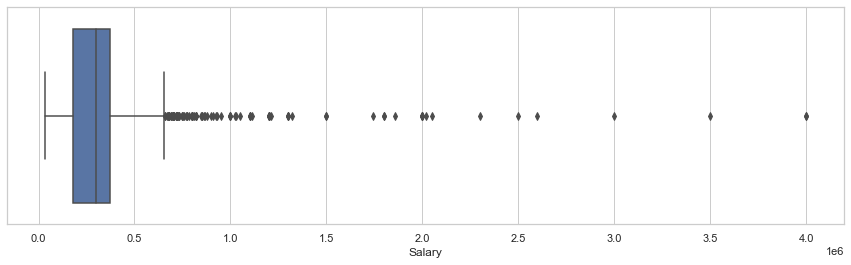

In [8]:
plt.figure(figsize=(15, 4))
sns.boxplot(df["Salary"])

Text(0.5, 0.98, 'Salary levels by gender')

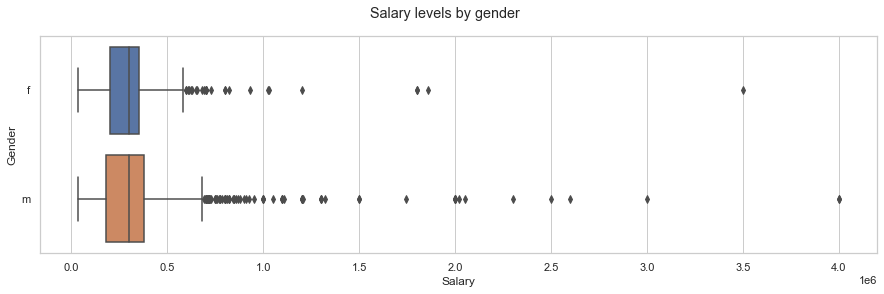

In [9]:
plt.figure(figsize=(15, 4))
sns.boxplot(x='Salary', y='Gender', data=df)
plt.suptitle('Salary levels by gender')

**Observation**
* Average Salary of Male and Female are same.
* The number of outlier are more for man which means there are people which are earning the highest compared to woman

In [10]:
# Checking the male and female count and their ratio
male_count = df["Gender"].where(df["Gender"] == "m").count()
female_count = df["Gender"].where(df["Gender"] == "f").count()

print(f"Number of male candidates : {male_count}")
print(f"Number of female candidates : {female_count}")
print('Male to Female ratio: {:.2f}'.format(male_count / female_count))

Number of male candidates : 3041
Number of female candidates : 957
Male to Female ratio: 3.18


<AxesSubplot:>

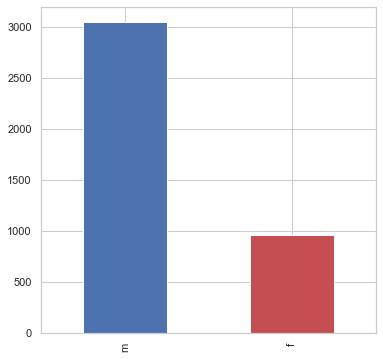

In [11]:
# Plotting the bar plot for gender category
df["Gender"].value_counts().plot(kind="bar", figsize=(6, 6), color = ["b", "r"])

<AxesSubplot:xlabel='Salary', ylabel='Count'>

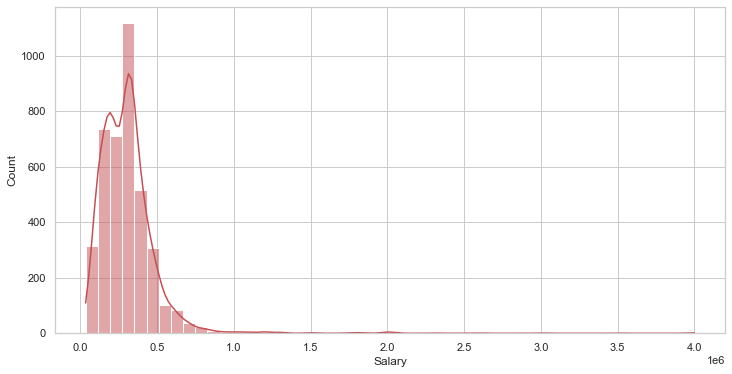

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Salary"], bins=50, kde=True, color=["r"])

**Observation :- Data is Right Skewed (Log normal Distribution)**

<AxesSubplot:xlabel='Logical', ylabel='Salary'>

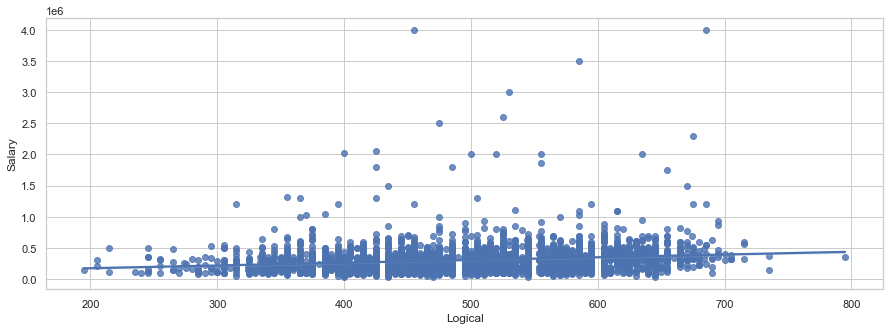

In [13]:
plt.figure(figsize=(15, 5))
sns.regplot(x="Logical", y="Salary", data=df)

**Observation:- It seems there is a Linear Relationship between Logic and Salary**

In [14]:
# Lets find the relationship
# creating new columns 
df['AverageScore'] = (df['Logical'] + df['Quant'] + df['English']) / 3
df['Acadperf'] = df['10percentage'] + df['12percentage'] + df['collegeGPA'] / 3

<AxesSubplot:xlabel='AverageScore', ylabel='Salary'>

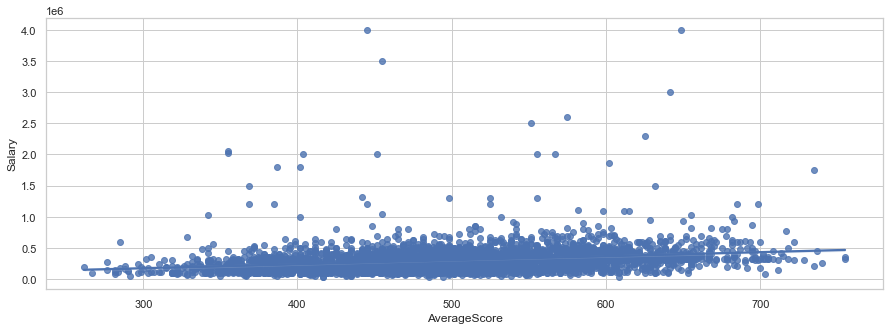

In [15]:
# lpositive correlation between salary and average(logical+quant+english) score is indicated
plt.figure(figsize=(15, 5))
sns.regplot(x='AverageScore', y='Salary', data=df)

<AxesSubplot:>

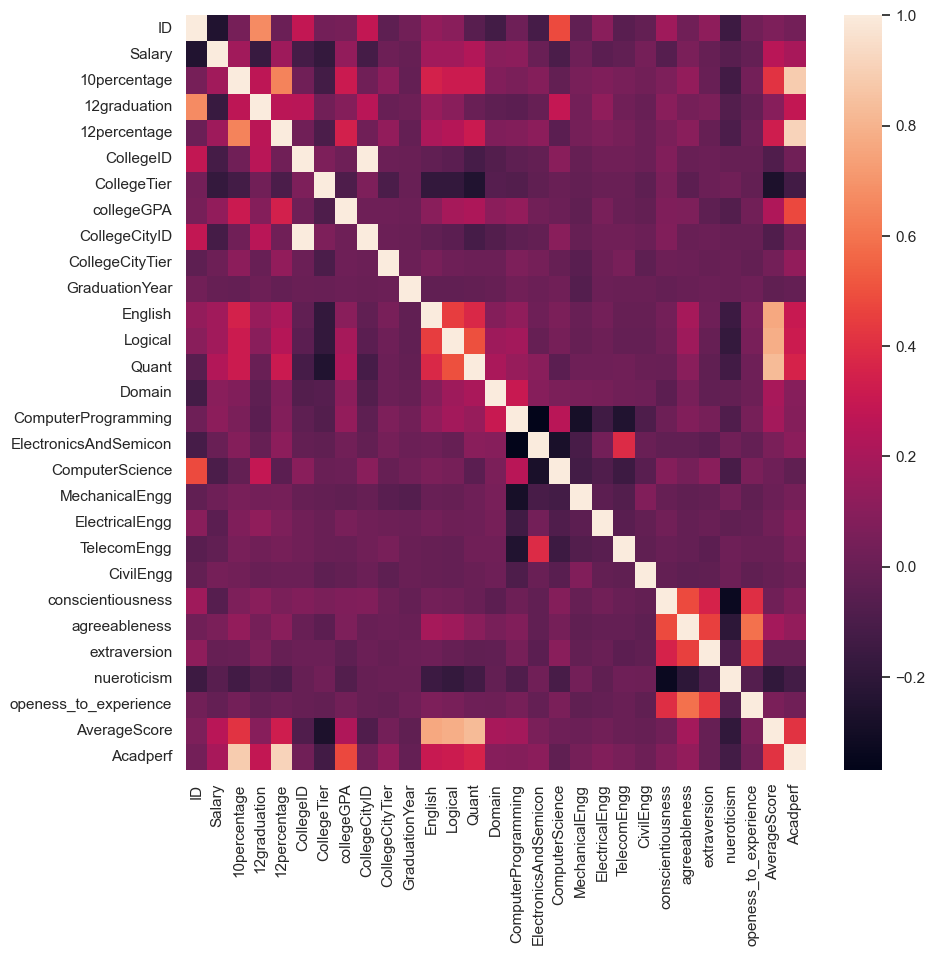

In [16]:
# plotting the correlation matrix of the dataset
plt.figure(figsize= (10, 10), dpi=100)
sns.heatmap(df.corr()) 

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Salary'>

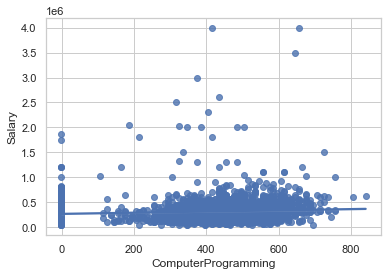

In [17]:
# positive correlation between salary and computer programming skills
sns.regplot(x='ComputerProgramming', y='Salary', data=df)

Text(0.5, 0.98, 'Salary levels by specialization')

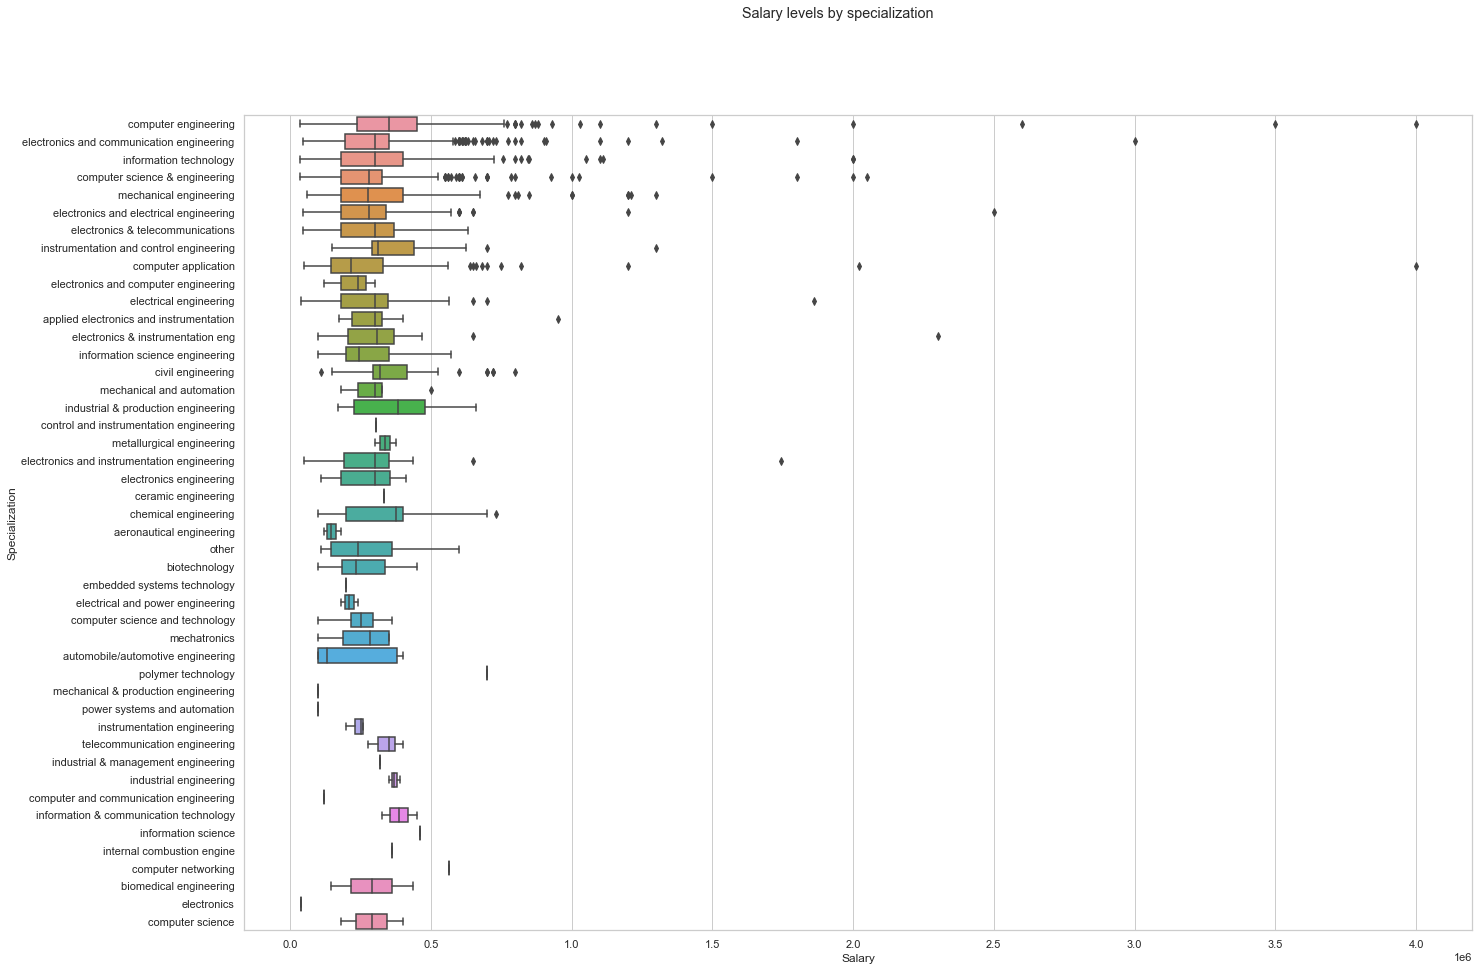

In [18]:
plt.figure(figsize=(22, 15))
sns.boxplot(x='Salary', y = 'Specialization', data=df)
plt.suptitle('Salary levels by specialization')

### Observations
* boxplot visualization of salary and specialization
* it is observed that CS department has many outliers indicating higher salaries are earned by those of CS specializaton
* the median salary of EC dept is higher than others.

### DATA CLEANING


In [19]:
df.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [20]:
# To find the anomolities in the data
for i in df.columns:
    print("*"*20, i, "*"*20)
    print(df[i].unique())

******************** Unnamed: 0 ********************
['train']
******************** ID ********************
[203097 579905 810601 ... 355888 947111 324966]
******************** Salary ********************
[ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000 

### Observations of the columns(regarding cleaning and missing values):
* 1. We can see the DOJ,DOL,DOB are given in timestamp format
* 2. Job city column contains -1 values which are NaN equivalents.
* 3. 10 board column contain 0 value which is missing value
* 4. 12 board column contain 0 value which is missing value
* 5. college state column contain 'union teritory' which is not a specific state
* 6. Graduation year column contain 0 which is a missing value
* 7. Domain column contain -1 which is a missing value<br><br>

* We can see the DOJ and DOL are given in timestamp format. As per our objective,we only need date,we will convert timestamp into date using datetime module.

* In DOL column,We can see the value 'present' . We will convert this into the present date for our analysis

In [21]:
import datetime as dt

In [22]:
df["DOJ"] = pd.to_datetime(df["DOJ"]).dt.date

In [23]:
df["DOL"].replace("present", dt.datetime.today(), inplace=True)

In [24]:
df["DOJ"] = pd.to_datetime(df["DOJ"]).dt.date

In [25]:
## We will engineer this feature from DOJ and DOL as we are only concerned with how many years the person has worked
## in the organisation.
df['Period'] = pd.to_datetime(df["DOL"]).dt.year - pd.to_datetime(df["DOJ"]).dt.year

In [26]:
#We only need DOB year,so we will convert DOB column from timestamp to year
df["DOB"] = pd.to_datetime(df["DOB"]).dt.year

In [27]:
df.head()

Unnamed: 0      ID   Salary         DOJ                        DOL  \
0      train  203097   420000  2012-06-01 2023-04-17 13:41:50.369791   
1      train  579905   500000  2013-09-01 2023-04-17 13:41:50.369791   
2      train  810601   325000  2014-06-01 2023-04-17 13:41:50.369791   
3      train  267447  1100000  2011-07-01 2023-04-17 13:41:50.369791   
4      train  343523   200000  2014-03-01 2015-03-01 00:00:00.000000   

                Designation    JobCity Gender   DOB  10percentage  \
0   senior quality engineer  Bangalore      f  1990          84.3   
1         assistant manager     Indore      m  1989          85.4   
2          systems engineer    Chennai      f  1992          85.0   
3  senior software engineer    Gurgaon      m  1989          85.6   
4                       get    Manesar      m  1991          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  \
0         0.8128        0.5269      1.35490                -0.4455   
1         0.3789        1.2396     -0.10760                 0.8637   
2         1.7109        0.1637     -0.86820                 0.6721   
3         0.3448       -0.3440     -0.40780                -0.9194   
4        -0.2793       -1.0697      0.09163                -0.1295   

   Averag

We do not need 12th graduation and 10th graduation timestamps,we only need the age of people during graduation to know whether they have any drop years.<br><br>
So we drop those columns and engineer new columns<br>
* 12graduation - It indicates the age of person during 12th graduation<br>
* Gradage - It indicates the age of person during their higher education graduation(Degree/Engineering etc)

In [28]:
# We also know graduation year contains 0 values we need to impute with mode before engineering new features from this
df["GraduationYear"].replace(0, df.GraduationYear.mode()[0], inplace=True)

In [29]:
df["GraduationYear"] = pd.to_datetime(df["GraduationYear"])

In [30]:
df["gyear"] = df["GraduationYear"].dt.year

In [31]:
# New columns which can be used to know
df["12GradAge"] = abs(df["12graduation"] - df["DOB"])

In [32]:
df["GradAge"] = abs(df["gyear"] - df["DOB"])

In [33]:
# NO of 0 per column
(df == 0).astype(int).sum(axis=0) 

Unnamed: 0                  0
ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                   350
12graduation                0
12percentage                0
12board                   359
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg 

In [34]:
df.isin([-1, 'NaN']).sum()

Unnamed: 0                  0
ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg 

### Column : 'Designation'

* Designation Column has 'get' value which is a not a desired value.We should clean this and can be imputed with mode of the column.

In [35]:
### Here we could have compared modes of all the columns and then could have selected the mode out of the resulting modes
df[df["Designation"] == "get"][['Designation','JobCity','Salary','Specialization']]

Designation    JobCity   Salary  \
4            get    Manesar   200000   
332          get         -1   180000   
350          get  Faridabad   340000   
1717         get  Hyderabad   145000   
1897         get  Hyderabad   175000   
2140         get     Indore   600000   
2318         get    Lucknow   220000   
2443         get  kharagpur   110000   
2666         get  Hyderabad   200000   
2757         get     Nashik   350000   
3045         get  Sahibabad   180000   
3126         get     Bhopal  1210000   
3594         get     MEERUT   280000   
3980         get    haryana   150000   

                                 Specialization  
4     electronics and communication engineering  
332                   mechanical and automation  
350                      electrical engineering  
1717                     mechanical engineering  
1897                     mechanical engineering  
2140                     mechanical engineering  
2318     electronics and electrical engineering  
2443                     mechanical engineering  
2666     electronics and electrical engineering  
2757                     mechanical engineering  
3045     electronics and electrical engineering  
3126                     mechanical engineering  
3594                     mechanical engineering  
3980                     mechanical engineering

### Observations:

* From here,we can see that most of people whose designation is unknown are from mechanical domain(70%) and ECE(30%).

* So we can pick the mode of designation for people belonging to mechanical domain and impute it with get value.

* similarly for electrical domain

In [39]:
# For people with mechanical engineering it gives the mode value which will be replaced with the "get"
mech = df[df['Specialization'].isin(['mechanical engineering','mechanical and automation'])]['Designation'].mode()[0]

In [40]:
#for people with electronics and electrical engineering,it gives the mode value which will be replaced with the 'get'.
eee = df[df['Specialization'] == ('electronics and electrical engineering')]['Designation'].mode()[0]

In [41]:
print(f'mode for mechanical:  {mech}\nmode for EEE:  {eee}')

mode for mechanical:  production engineer
mode for EEE:  system engineer


#### Now we will impute the 'get' of designation with modes of the respective domains

In [42]:
#For mechanical domain
df.loc[df['Specialization'].isin(['mechanical engineering','mechanical and automation']),'Designation'].replace('get', mech, inplace=True)

In [43]:
#for EEE domain,as all previous get's will be replaced,we can replace the remaining directly without conditions
df['Designation'].replace('get',eee,inplace=True)

### Column : 'Jobcity'
* Jobcity contains missing values(-1).We will treat this by using mode.We will compute the mode of all columns with rows having jobcity as -1.Then we make a list of these modes and compute the overall mode of the resulting list.

* In this way,we could consider all columns for substituting the missing value.

In [44]:
### we do not want our data to be case sensitive in jobcity
### because it will effect our analysis.so let us replace -1 with some string and then apply title method to it.
df['JobCity'].replace(-1, 'unknown', inplace=True)
df['JobCity'].apply(lambda x:x.title())

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3998, dtype: object

In [45]:
df[df["JobCity"] == 'unknown']

Unnamed: 0       ID  Salary         DOJ                        DOL  \
15        train   536517  350000  2013-08-01 2023-04-17 13:41:50.369791   
21        train   339689  200000  2012-08-01 2013-12-01 00:00:00.000000   
39        train   533417  200000  2013-01-01 2013-06-01 00:00:00.000000   
77        train   754392  120000  2014-07-01 2023-04-17 13:41:50.369791   
79        train  1089852  100000  2013-08-01 2014-05-01 00:00:00.000000   
...         ...      ...     ...         ...                        ...   
3937      train   385546  205000  2012-10-01 2014-02-01 00:00:00.000000   
3942      train  1067015  280000  2013-07-01 2023-04-17 13:41:50.369791   
3954      train   531726  310000  2014-04-01 2015-04-01 00:00:00.000000   
3973      train   755067  335000  2013-08-01 2023-04-17 13:41:50.369791   
3974      train   641821  180000  2013-06-01 2014-07-01 00:00:00.000000   

                        Designation  JobCity Gender   DOB  10percentage  \
15                 network engineer  unknown      f  1990         69.54   
21                software engineer  unknown      f  1991         75.67   
39               management trainee  unknown      m  1991         88.00   
77                    test engineer  unknown      m  1992         76.00   
79               software developer  unknown      f  1992         86.00   
...                             ...      ...    ...   ...           ...   
3937            production engineer  unknown      m  1991         84.80   
3942              software engineer  unknown      m  1990         78.00   
3954  business intelligence analyst  unknown      f  1992         88.40   
3973             programmer analyst  unknown      m  1990         66.85   
3974               quality engineer  unknown      m  1991         70.80   

                               10board  12graduation  12percentage  \
15                                icse          2008         64.43   
21                                  up          2007         74.40   
39    kerala state technical education          2008         89.66   
77                         state board          2009         72.00   
79                         state board          2009         95.00   
...                                ...           ...           ...   
3937                              cbse          2008         81.40   
3942                       state board          2009         91.00   
3954                               ssc          2009         92.90   
3973                       state board          2008         59.11   
3974                              cbse          2008         65.20   

                     12board  CollegeID  CollegeTier       Degree  \
15                       isc       4501            2  B.Tech/B.E.   
21                        up      11368            2  B.Tech/B.E.   
39    kerala state hse board        867            2  B.Tech/B.E.   
77               state board       8888            2  B.Tech/B.E.   
79               state board       4726            2  B.Tech/B.E.   
...                      ...        ...          ...          ...   
3937                    cbse        100            2  B.Tech/B.E.   
3942             state board      11183            2  B.Tech/B.E.   
3954   board of intermediate        492            2  B.Tech/B.E.   
3973             state board       1906            2  B.Tech/B.E.   
3974                    cbse       1622            2  B.Tech/B.E.   

                                   Specialization  collegeGPA  CollegeCityID  \
15                         information technology       63.00           4501   
21                         information technology       74.01          11368   
39      electronics and communication engineering       76.40            867   
77                 computer science & engineering       63.20           8888   
79      electronics and communication engineering       78.60           4726   
...                                           ...    

In [47]:
df[df["JobCity"]=="unknown"][["Designation","12GradAge","GradAge","JobCity","Gender","10percentage","10board","12percentage","12board","Degree","Specialization","CollegeState","Specialization"]].mode()

Designation  12GradAge  GradAge  JobCity Gender  10percentage  \
0  software engineer       18.0     21.0  unknown      m          76.0   
1                NaN        NaN      NaN      NaN    NaN          78.0   
2                NaN        NaN      NaN      NaN    NaN          82.0   

  10board  12percentage 12board       Degree  \
0    cbse          64.0    cbse  B.Tech/B.E.   
1     NaN          66.0     NaN          NaN   
2     NaN           NaN     NaN          NaN   

                              Specialization   CollegeState  \
0  electronics and communication engineering  Uttar Pradesh   
1                                        NaN            NaN   
2                                        NaN            NaN   

                              Specialization  
0  electronics and communication engineering  
1                                        NaN  
2                                        NaN

In [48]:
### cleaning the column which have similar meaning but has spelling difference orelse it will effect the distribution.
df["JobCity"].replace("Bangalore","Bengaluru",inplace=True)
df["JobCity"].replace("Banaglore","Bengaluru",inplace=True)
df["JobCity"].replace("Chennai, Bangalore","Bengaluru",inplace=True)
df["JobCity"].replace(" Bangalore","Bengaluru",inplace=True)
df["JobCity"].replace("Bangalore ","Bengaluru",inplace=True)
df["JobCity"].replace("Banglore","Bengaluru",inplace=True)
df["JobCity"].replace("Jaipur ","Jaipur",inplace=True)
df["JobCity"].replace("Gandhinagar","Gandhi Nagar",inplace=True)
df["JobCity"].replace("Bangalore ","Bengaluru",inplace=True)
df["JobCity"].replace("Jaipur ","Jaipur",inplace=True)
df["JobCity"].replace("Gandhinagar","Gandhi Nagar",inplace=True)
df["JobCity"].replace("Hyderabad ","Hyderabad",inplace=True)
df["JobCity"].replace("Hyderabad(Bhadurpally)","Hyderabad",inplace=True)
df["JobCity"].replace("Bhubaneswar ","Bhubaneswar",inplace=True)
df["JobCity"].replace("Delhi/Ncr","Delhi",inplace=True)
df["JobCity"].replace("Nagpur ","Nagpur",inplace=True)
df["JobCity"].replace("Pune ","Pune",inplace=True)
df["JobCity"].replace("Trivandrum ","Trivandrum",inplace=True)
df["JobCity"].replace("Thiruvananthapuram","Trivandrum",inplace=True)

In [49]:
### First,we saw the frequent(mode) values in other columns when we have a missing value in our target column('Jobcity')
### Now,we will find list of modes of other columns when they have the above found frequent value in their respective column.
### In this way,we are able to include the presence of all columns in predicting our best shot for the missing value.

best_mode = []
best_mode.append(df[df["Designation"]=="software engineer"]["JobCity"].mode().to_list()[0])
best_mode.append(df[df["Gender"]=="m"]["JobCity"].mode().to_list()[0])
best_mode.append(df[df["10percentage"]==76]["JobCity"].mode().to_list()[0])
best_mode.append(df[df["10board"]=="cbse"]["JobCity"].mode().to_list()[0])
best_mode.append(df[df["12percentage"]==64]["JobCity"].mode().to_list()[0])
best_mode.append(df[df["12board"]=="cbse"]["JobCity"].mode().to_list()[0])
best_mode.append(df[df["collegeGPA"]==70]["JobCity"].mode().to_list()[0])
best_mode.append(df[df["Salary"]==200000]["JobCity"].mode().to_list()[0])
best_mode.append(df[df["Degree"].str.startswith("B.Tech/")]["JobCity"].mode().to_list()[0])
best_mode.append(df[df["Specialization"].str.startswith("electronics and communication eng")]["JobCity"].mode().to_list()[0])
best_mode.append(df[df["CollegeState"].str.startswith("Uttar Pradesh")]["JobCity"].mode().to_list()[0])
best_mode

['Bengaluru',
 'Bengaluru',
 'unknown',
 'Noida',
 'unknown',
 'Noida',
 'Bengaluru',
 'unknown',
 'Bengaluru',
 'Bengaluru',
 'Noida']

In [50]:
### We can see mode from the best_mode list is 'Bangalore'
df["JobCity"].replace("unknown",'Bengaluru',inplace=True)

### Column: '10-board'

* This column has missing values in the form of '0'.Let us handle these using same proceedure(mode).

In [51]:
df[df["10board"]==0][["Designation","12GradAge","GradAge","JobCity","Gender","10percentage","10board","12percentage","12board","Degree","Specialization","CollegeState","Specialization"]].mode()

Designation  12GradAge  GradAge    JobCity Gender  10percentage  \
0  software engineer       18.0     19.0  Bengaluru      m          75.0   
1    system engineer        NaN      NaN        NaN    NaN           NaN   

  10board  12percentage 12board       Degree        Specialization  \
0       0          65.0       0  B.Tech/B.E.  computer engineering   
1     NaN           NaN     NaN          NaN                   NaN   

  CollegeState        Specialization  
0   Tamil Nadu  computer engineering  
1          NaN                   NaN

In [52]:
### Same process as above written for jobcity
best_value2=[]
best_value2.append(df[df["Designation"]=="software engineer"]["10board"].mode().to_list()[0])
best_value2.append(df[df["Gender"]=="m"]["10board"].mode().to_list()[0])
best_value2.append(df[df["10percentage"]==75]["10board"].mode().to_list()[0])
best_value2.append(df[df["JobCity"]=="Bengaluru"]["10board"].mode().to_list()[0])
best_value2.append(df[df["12percentage"]==65]["10board"].mode().to_list()[0])
best_value2.append(df[df["collegeGPA"]==65]["10board"].mode().to_list()[0])
best_value2.append(df[df["Salary"]==400000]["10board"].mode().to_list()[0])
best_value2.append(df[df["Degree"].str.startswith("B.Tech/")]["10board"].mode().to_list()[0])
best_value2.append(df[df["Specialization"].str.startswith("computer eng")]["10board"].mode().to_list()[0])
best_value2.append(df[df["CollegeState"].str.startswith("Tamil Nadu")]["10board"].mode().to_list()[0])
best_value2

['cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'state board']

In [53]:
### Replacing with the mode of the best_value list(visually as it is a small list orelse could have written code for it.)
df['10board'].replace(0,'cbse',inplace=True)

### Column: '12-board'

* This column has missing values in the form of '0'.Let us handle these using same proceedure(mode).

In [54]:
### From what i found from above,we can be sure that 12 board missing value can be replaced with 'cbse' 
### as most of the people do 12th also from the same board.(general observation,can also be proved)
df['12board'].replace(0,'cbse',inplace=True)

### Column : 'Domain'

* This column has missing values in form of -1 and column looks standardized.We can use general mean/median/mode to impute the missing value.

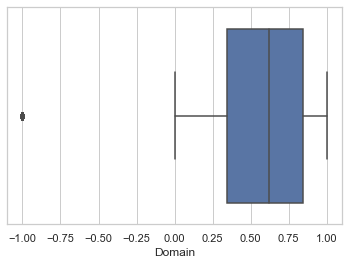

In [56]:
sns.boxplot(df['Domain'])
plt.show()

In [57]:
## As we can see outlier,it is better to use median to replace the missing values.
df['Domain'].replace(-1, df['Domain'].median(),inplace=True)
df.head()

Unnamed: 0      ID   Salary         DOJ                        DOL  \
0      train  203097   420000  2012-06-01 2023-04-17 13:41:50.369791   
1      train  579905   500000  2013-09-01 2023-04-17 13:41:50.369791   
2      train  810601   325000  2014-06-01 2023-04-17 13:41:50.369791   
3      train  267447  1100000  2011-07-01 2023-04-17 13:41:50.369791   
4      train  343523   200000  2014-03-01 2015-03-01 00:00:00.000000   

                Designation    JobCity Gender   DOB  10percentage  \
0   senior quality engineer  Bengaluru      f  1990          84.3   
1         assistant manager     Indore      m  1989          85.4   
2          systems engineer    Chennai      f  1992          85.0   
3  senior software engineer    Gurgaon      m  1989          85.6   
4           system engineer    Manesar      m  1991          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState                GraduationYear  English  \
0                0  Andhra Pradesh 1970-01-01 00:00:00.000002011      515   
1                0  Madhya Pradesh 1970-01-01 00:00:00.000002012      695   
2                0   Uttar Pradesh 1970-01-01 00:00:00.000002014      615   
3                1           Delhi 1970-01-01 00:00:00.000002011      635   
4                0   Uttar Pradesh 1970-01-01 00:00:00.000002012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                     -1   
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   
4      625    465  0.124502                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  AverageScore    Acadperf  Period  gye

### Column - 12board
* replacing the redundant values of the 12board column with 'state','cbse','icse'.

In [58]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' and 'n/a'
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','intermideate','up bord','andhra pradesh state board','gujarat board']

In [61]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' 
for i in replace_list_state:
    df['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    df['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    df['12board'].replace(i,'icse',inplace=True)

df['12board'].unique()

array(['state', 'cbse', 'icse'], dtype=object)

In [62]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

In [64]:
df['Specialization'] = df['Specialization'].map(specialization_map)
df['Specialization'].unique()

array(['CS', 'EC', 'ME', 'EL', 'CE', 'other'], dtype=object)

#### So far,the cleaning part has been done.We can start our univariate and bivariate analysis and draw inferences. 

In [65]:
df.drop(columns=['CollegeID','CollegeCityID','CollegeCityTier'],axis=1,inplace=True)

In [66]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'AverageScore', 'Acadperf',
       'Period', 'gyear', '12GradAge', 'GradAge'],
      dtype='object')

In [68]:
### Salary less than 50000 people might have entered their montly income rather than yearly
df.loc[df['Salary'] <= 50000, 'Salary'] *= 12
lst = ['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']
for i in lst:
    df[i].replace(-1, 0, inplace=True)

### DATA VISUALIZATION

<Figure size 1080x360 with 0 Axes>

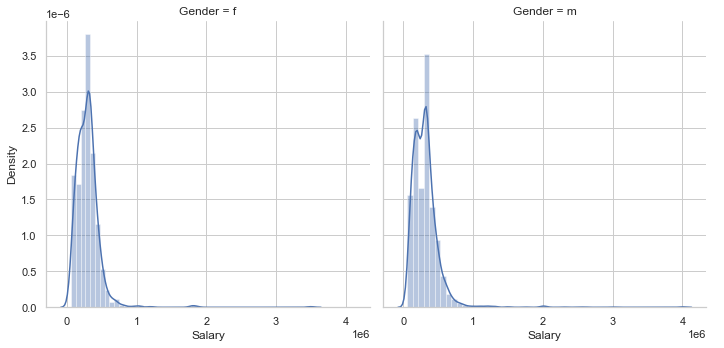

<function print>

In [70]:
plt.figure(figsize=(15,5))
colors = sns.color_palette('bright',n_colors=2)
sns.FacetGrid(df, col="Gender", size=5,palette=colors) \
   .map(sns.distplot, "Salary",bins=50) \
   .add_legend()
plt.show()
print

#### Observations:
* We can observe that the salary data is right skewed.
* We can also see that the distributions are quite similar for male and female in the range below 10lakhs.

m    3041
f     957
Name: Gender, dtype: int64


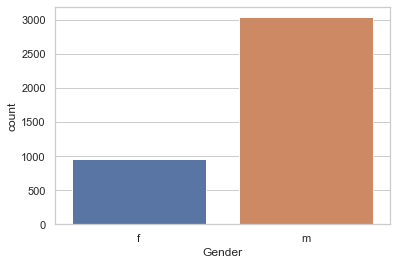

In [73]:
sns.countplot(df['Gender'])
print(df['Gender'].value_counts())

* The ratio of m/f is 3.19 indicates there are 3 times more men than women employed

<AxesSubplot:xlabel='Salary', ylabel='Gender'>

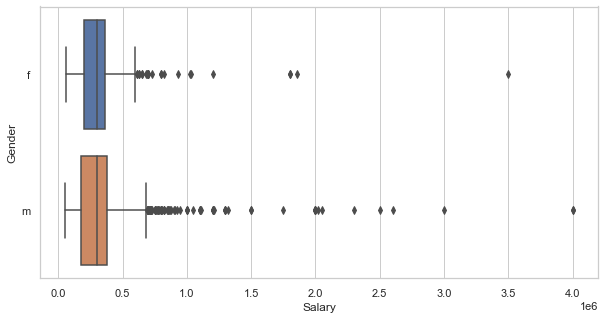

In [74]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Salary',y='Gender',data=df)

* It is noted that there are many outliers in the salary data
* There is not much difference between median salary for both genders.
* We can also observe male have more outliers indicating they are more people getting higher pays in male than female category

Text(0.5, 0.98, 'Salary levels by specialization')

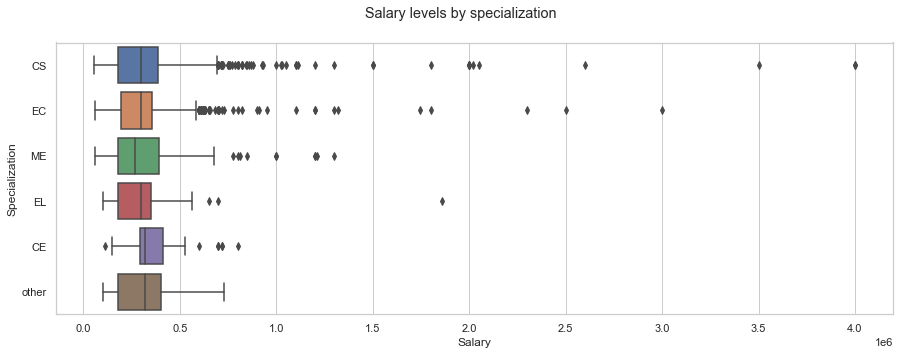

In [75]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Salary',y='Specialization',data=df)
plt.suptitle('Salary levels by specialization')

* Median salary of people from all specializations are nearly similar.
* We can see there are more people getting higher pays who have specialization in CS/EC compared to others.

In [77]:
### Designation
popular_Designation = df['Designation'].value_counts()[:20].index.tolist()
print(popular_Designation)

['software engineer', 'software developer', 'system engineer', 'programmer analyst', 'systems engineer', 'java software engineer', 'software test engineer', 'project engineer', 'technical support engineer', 'senior software engineer', 'java developer', 'test engineer', 'web developer', 'application developer', 'assistant manager', 'network engineer', 'data analyst', 'business analyst', 'engineer', 'associate software engineer']


In [81]:
### We want on
top_Designations = df[df['Designation'].isin(popular_Designation)]
print(f"Unique professions : {len(df['Designation'].unique())}")
top_Designations.head()

Unique professions : 418


Unnamed: 0       ID   Salary         DOJ                        DOL  \
1      train   579905   500000  2013-09-01 2023-04-17 13:41:50.369791   
2      train   810601   325000  2014-06-01 2023-04-17 13:41:50.369791   
3      train   267447  1100000  2011-07-01 2023-04-17 13:41:50.369791   
4      train   343523   200000  2014-03-01 2015-03-01 00:00:00.000000   
5      train  1027655   300000  2014-06-01 2023-04-17 13:41:50.369791   

                Designation    JobCity Gender   DOB  10percentage  \
1         assistant manager     Indore      m  1989         85.40   
2          systems engineer    Chennai      f  1992         85.00   
3  senior software engineer    Gurgaon      m  1989         85.60   
4           system engineer    Manesar      m  1991         78.00   
5           system engineer  Hyderabad      m  1992         89.92   

       10board  12graduation  12percentage 12board  CollegeTier       Degree  \
1         cbse          2007          85.0    cbse            2  B.Tech/B.E.   
2         cbse          2010          68.2    cbse            2  B.Tech/B.E.   
3         cbse          2007          83.6    cbse            1  B.Tech/B.E.   
4         cbse          2008          76.8    cbse            2  B.Tech/B.E.   
5  state board          2010          87.0   state            2  B.Tech/B.E.   

  Specialization  collegeGPA    CollegeState                GraduationYear  \
1             EC       70.06  Madhya Pradesh 1970-01-01 00:00:00.000002012   
2             CS       70.00   Uttar Pradesh 1970-01-01 00:00:00.000002014   
3             CS       74.64           Delhi 1970-01-01 00:00:00.000002011   
4             EC       73.90   Uttar Pradesh 1970-01-01 00:00:00.000002012   
5             EC       76.32       Karnataka 1970-01-01 00:00:00.000002014   

   English  Logical  Quant    Domain  ComputerProgramming  \
1      695      610    780  0.960603                    0   
2      615      545    370  0.450877                  395   
3      635      585    625  0.974396                  615   
4      545      625    465  0.124502                    0   
5      560      555    620  0.622643                  645   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
1                    466                0               0               0   
2                      0                0               0               0   
3                      0                0               0               0   
4                    233                0               0               0   
5                      0              407               0               0   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
1            0          0            -0.7335         0.3789        1.2396   
2            0          0             0.2718         1.7109        0.1637   
3            0          0             0.0464         0.3448       -0.3440   
4            0          0            -0.8810        -0.2793       -1.0697   
5            0          0            -0.3027        -0.6201       -2.2954   

   nueroticism  openess_to_experience  AverageScore    Acadperf  Period  \
1     -0.10760                 0.8637    695.000000  193.753333      10   
2     -0.86820                 0.6721    510.000000  176.533333       9   
3     -0.40780                -0.9194    615.000000  194.080000      12   
4      0.09163                -0.1295    545.000000  179.433333       1   
5     -0.74150                -0.8608    578.333333  202.360000       9   

   gyear  12GradAge  GradAge  
1   1970         18       19  
2   1970         18       22  
3   1970         18       19  
4   1970         17       21  
5   1970         18       22

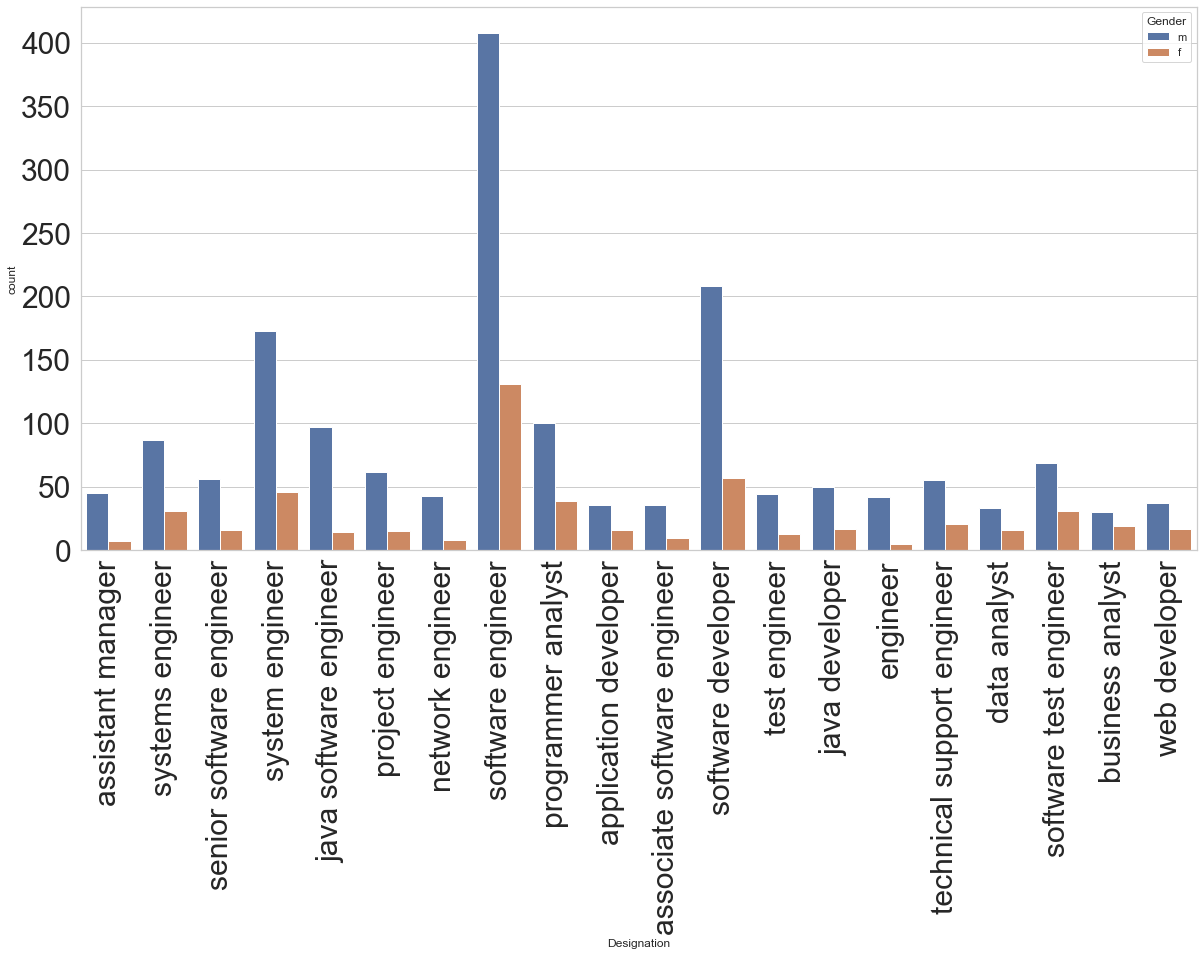

In [82]:
plt.figure(figsize=(20,10))
sns.countplot(x='Designation',hue='Gender',data=top_Designations)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

* All the general professions are more dominated by the males as we can there is considerable difference of frequency for every role.

* Here we took the most common roles taken by the amcat aspirants which are mostly 'IT Roles'.

* from the below plot,we can understand the reason for most 'IT roles' might be because of Specialization.

<AxesSubplot:xlabel='Specialization', ylabel='count'>

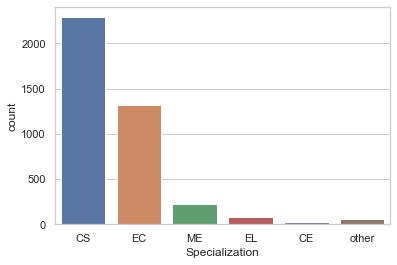

In [84]:
sns.countplot(df['Specialization'])

<AxesSubplot:xlabel='Degree', ylabel='count'>

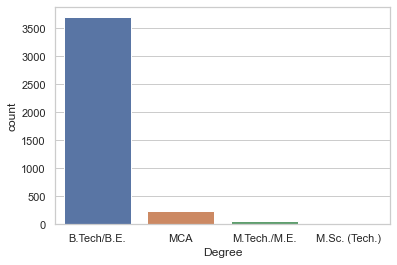

In [85]:
sns.countplot(df['Degree'])

* Most of the Amcat aspirants are from Btech domain

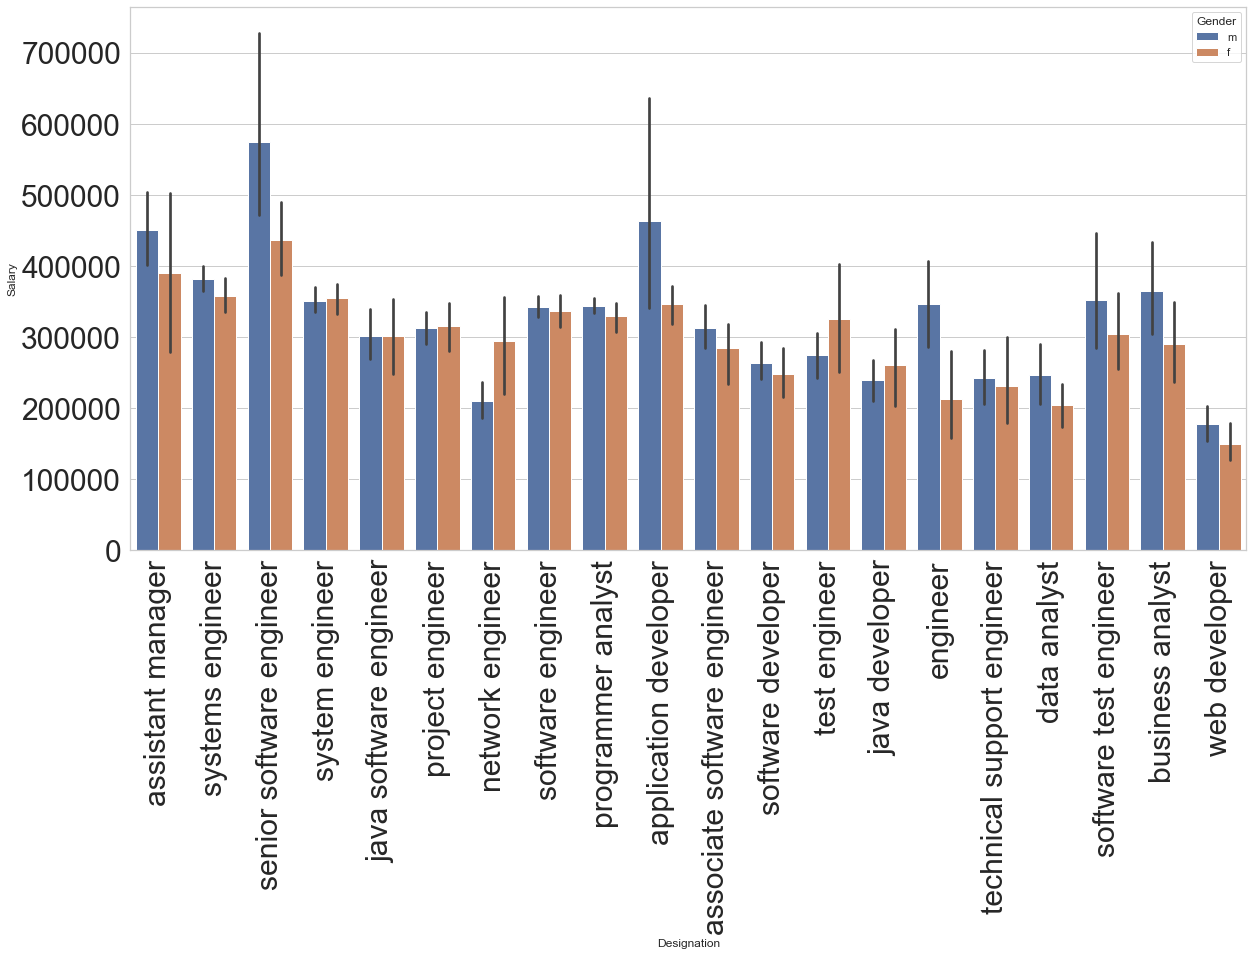

In [86]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=top_Designations)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

- mean salary of top most frequent roles is nearly independent of gender.
- there is some considerable difference in some roles.but we cannot be sure that women is being paid less in that role
- it might be due to experience,specialization etc.

In [88]:
### Now lets us see the high paying designations and their relation with respect to gender
high = list(df.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
high_pay = df[df['Designation'].isin(high)]
high_pay.head()

Unnamed: 0       ID   Salary         DOJ                        DOL  \
3       train   267447  1100000  2011-07-01 2023-04-17 13:41:50.369791   
6       train   947847   300000  2014-08-01 2015-05-01 00:00:00.000000   
14      train  1279958   300000  2013-07-01 2023-04-17 13:41:50.369791   
19      train   466888   325000  2014-09-01 2023-04-17 13:41:50.369791   
20      train   140069   320000  2010-11-01 2012-09-01 00:00:00.000000   

                 Designation    JobCity Gender   DOB  10percentage  \
3   senior software engineer    Gurgaon      m  1989         85.60   
6     java software engineer  Bengaluru      m  1993         86.08   
14    java software engineer  Bengaluru      m  1992         81.20   
19         software engineer       Pune      f  1990         79.00   
20         software engineer  Bengaluru      f  1988         91.20   

                                      10board  12graduation  12percentage  \
3                                        cbse          2007         83.60   
6                                 state board          2010         67.50   
14                                state board          2008         79.90   
19                                       cbse          2008         62.20   
20  karnataka secondary school of examination          2006         84.63   

   12board  CollegeTier       Degree Specialization  collegeGPA  \
3     cbse            1  B.Tech/B.E.             CS       74.64   
6    state            2  B.Tech/B.E.             CS       72.98   
14   state            2  B.Tech/B.E.             EC       67.67   
19    cbse            2  B.Tech/B.E.             CS       76.30   
20   state            2  B.Tech/B.E.             CS       78.15   

     CollegeState                GraduationYear  English  Logical  Quant  \
3           Delhi 1970-01-01 00:00:00.000002011      635      585    625   
6       Karnataka 1970-01-01 00:00:00.000002014      590      435    380   
14  Uttar Pradesh 1970-01-01 00:00:00.000002013      395      565    645   
19  Uttar Pradesh 1970-01-01 00:00:00.000002012      485      445    435   
20      Karnataka 1970-01-01 00:00:00.000002010      455      535    445   

      Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
3   0.974396                  615                      0                0   
6   0.356536                  405                      0              346   
14  0.622643                  495                      0              376   
19  0.864685                  525                      0                0   
20  0.635979                  445                      0                0   

    MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
3                0               0            0          0             0.0464   
6                0               0            0          0             1.7081   
14               0               0            0          0             0.7027   
19               0               0            0          0             0.8192   
20               0               0            0          0            -0.1082   

    agreeableness  extraversion  nueroticism  openess_to_experience  \
3          0.3448       -0.3440      -0.4078                -0.9194   
6         -0.1054       -1.0379      -2.0092                -1.0872   
14         0.7119        0.0100      -0.9950                 0.6721   
19         0.2668       -0.2714      -0.4078                -0.1295   
20         0.9688        0.5269      -0.2902                 0.3444   

    AverageScore    Acadperf  Period  gyear  12GradAge  GradAge  
3     615.000000  194.080000      12   1970         18       19  
6     468.333333  177.906667       1   1970         17       23  
14    535.000000  183.656667      10   1970         16       22  
19    455.000000  166.633333       9   1970         18       20  
20    478.333333  201.880000       2   1970         18       18

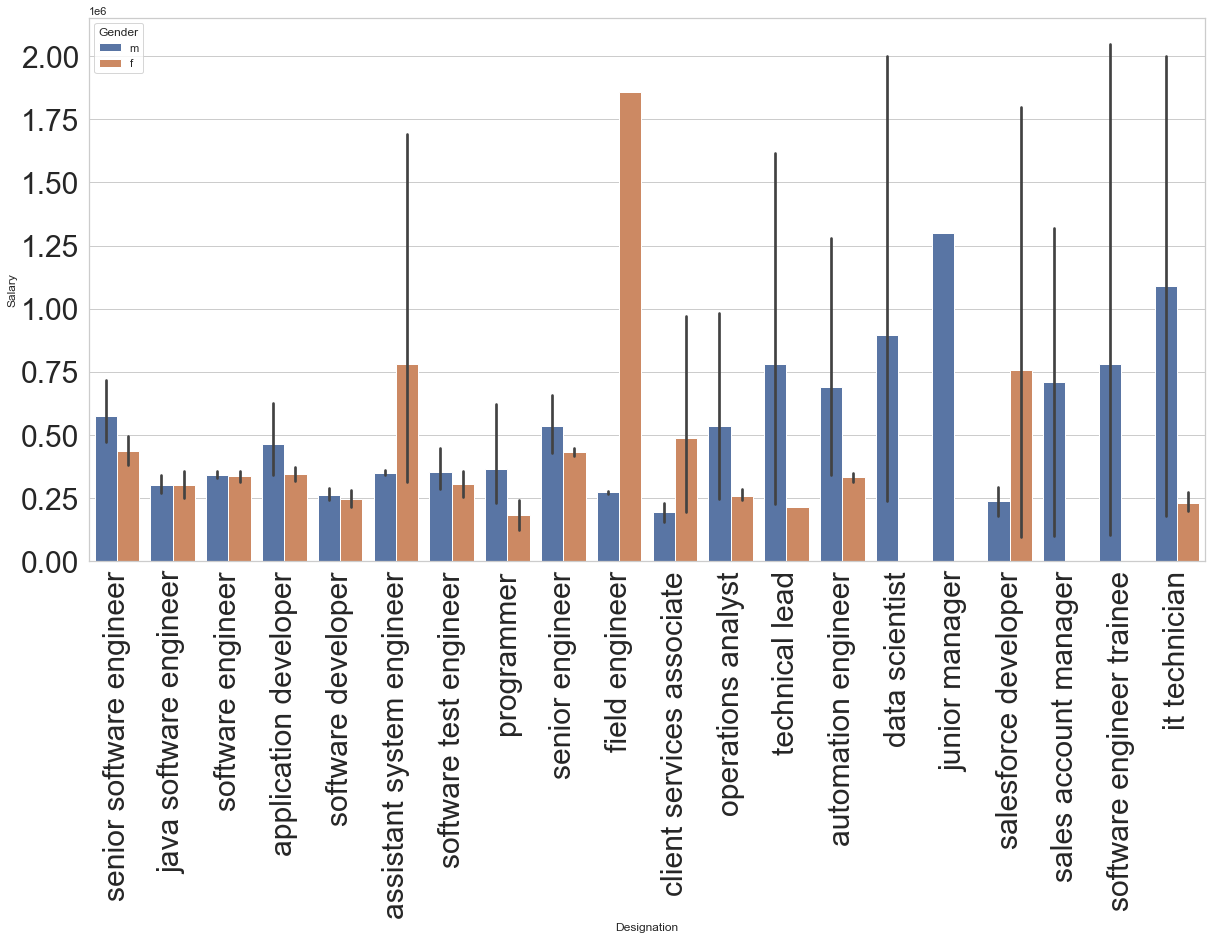

In [89]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=high_pay)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

* Most of the high paying jobs are from IT domain.
* In 45% of top paying roles,men are generally paid higher compared to women.
* In 20% of top paying roles,women are paid higher than men
* In roles like junior manager,sales account manager,software engineer trainee there are no women working in these fields.
* Junior manager is highest paying for men and field engineer is the highest paying role for women.
* The disperancy between pay based on gender might be because of other features like experience,specialization etc.
* Software Enginner and Software developer are most frequent and highest paying jobs

<AxesSubplot:>

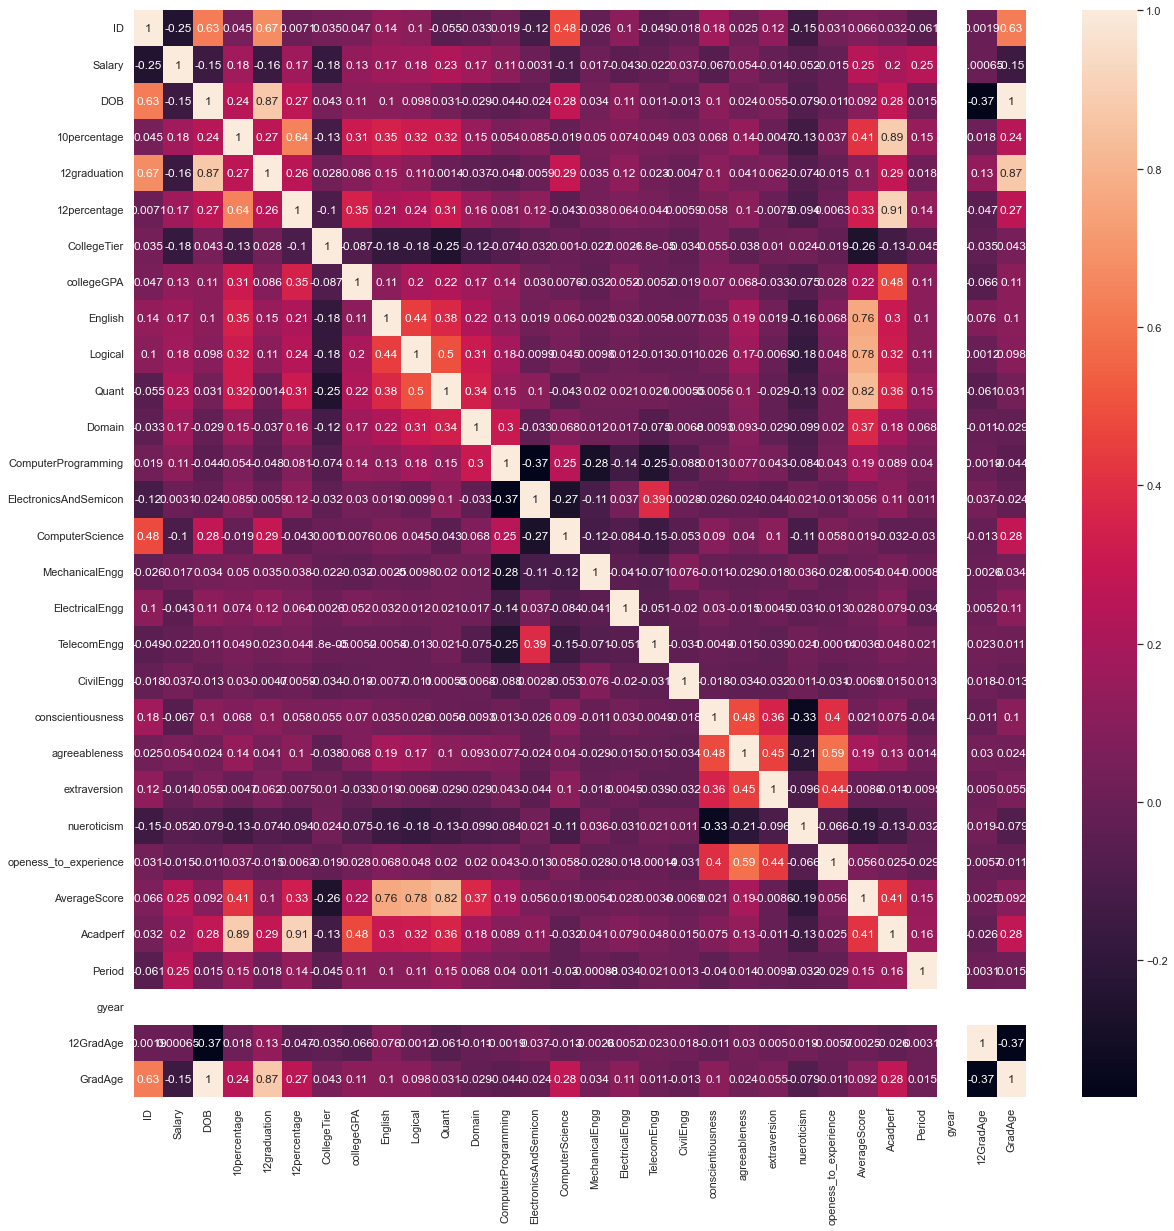

In [92]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

For Whole dataset
Gender
f    6.085526
m    5.723014
Name: Period, dtype: float64
********************
For High_paying jobs
Gender
f    5.341693
m    5.268662
Name: Period, dtype: float64


<Figure size 1440x360 with 0 Axes>

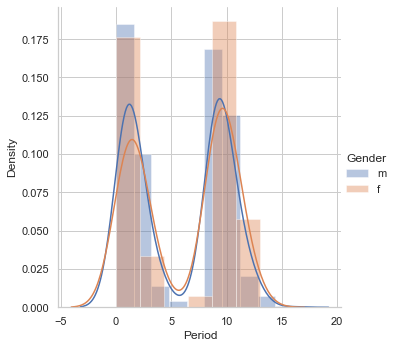

In [94]:
### Lets us check experience distribution of both male and female
plt.figure(figsize=(20,5))

sns.FacetGrid(high_pay, hue="Gender",size=5) \
   .map(sns.distplot, "Period") \
   .add_legend()
print('For Whole dataset')
print(high_pay.groupby('Gender').Period.mean())
print('*'*20)
print('For High_paying jobs')
print(df.groupby('Gender').Period.mean())

* It is a Bi-Modal Districution
* Average Experience of male is around 5years and for women it is around 4 and half years.

<AxesSubplot:xlabel='Period', ylabel='Salary'>

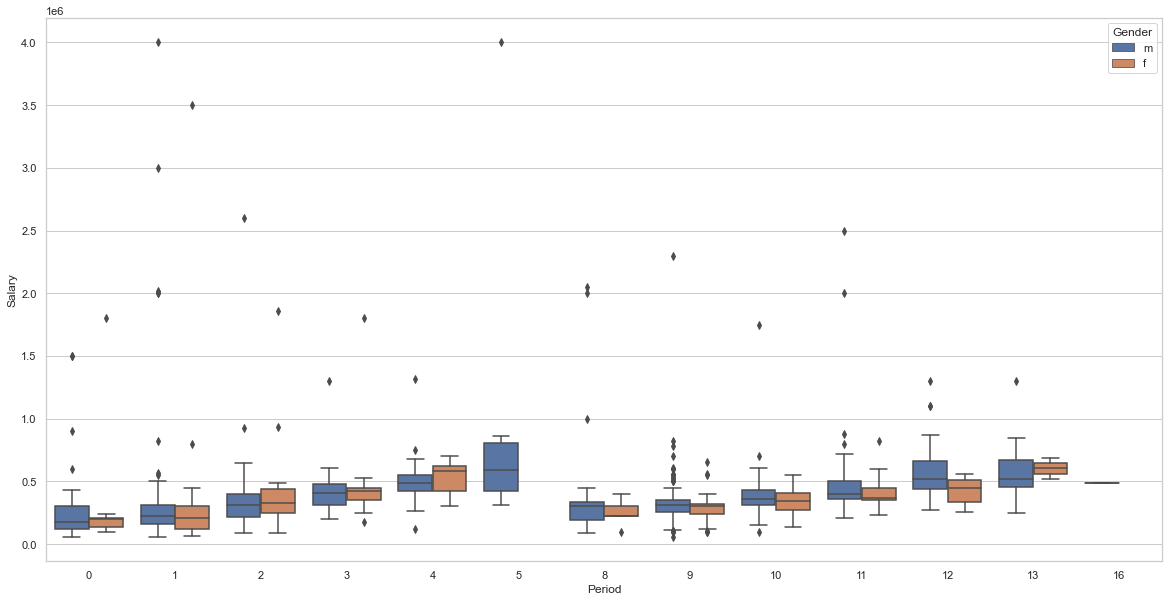

In [95]:
plt.figure(figsize=(20,10))
sns.boxplot(data=high_pay,x='Period',y='Salary',hue='Gender')

* Median salary of both males and females have increased slightly with exp for first five years
* and Decreased suddenly on the 6th year and then same pattern for the following years.
* e can see that men and women having same experience are paid nearly equally around 3.5-5 lakhs
* we need to further see the distribution of experience with respect to Designation for both men and women
* to check whether women are being paid less in a role due to experience.

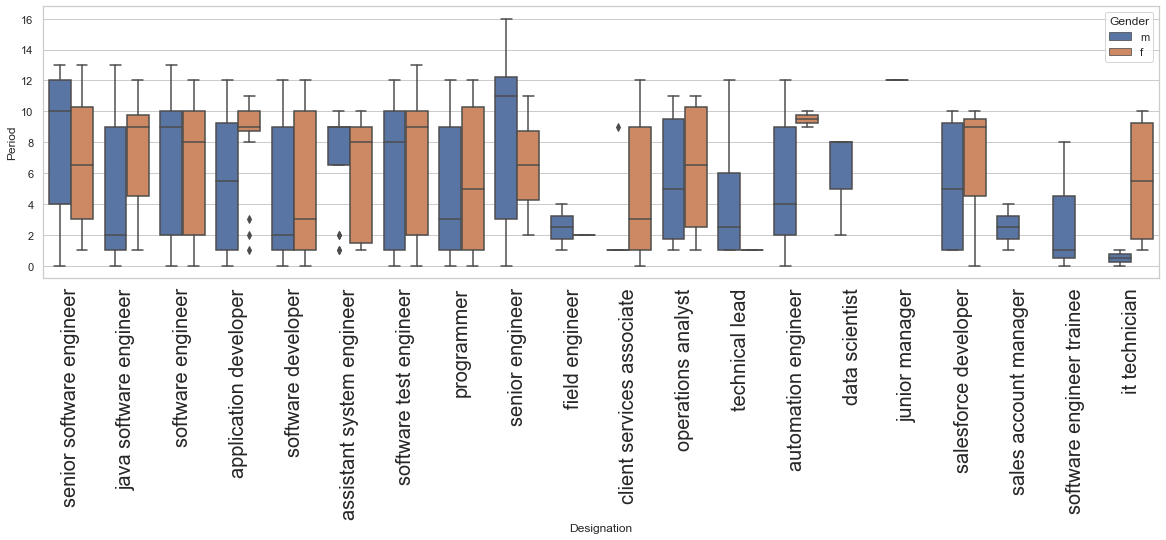

In [97]:
plt.figure(figsize=(20,5))
sns.boxplot(data=high_pay,x='Designation',y='Period',hue='Gender')
plt.xticks(fontsize=20,rotation=90)
plt.show()

* The period distribution for maximum number of Designations is skewed and this tells us every designation have people with both high and low experience
* We can see there is difference in median experience of male and female in every designation.
* But it is not a strong evidence to conclude salary difference for women is due to experience because of the fact that in some roles even women having higher experience are paid less and viceversa for men.
* Also Experience has not strong correlation with salary
* Maxium experience Designation is Senior Engineer

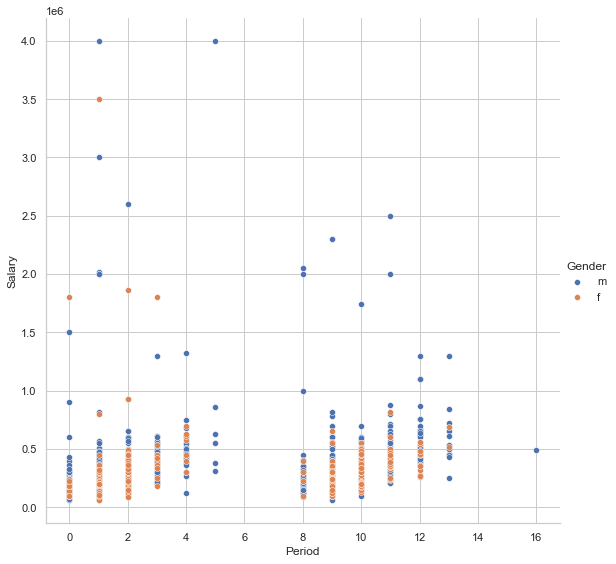

In [98]:
sns.FacetGrid(data=high_pay,hue='Gender', size=8) \
    .map(sns.scatterplot,'Period','Salary') \
    .add_legend()

* For same amount of experience,men are paid slightly higher than women in most of the cases.
* Mostly men have highly paid jobs compared with women for every level of experience.

In [100]:
### What is average experience of software engineer and software developer?
df[df.Designation.isin(['software engineer','software developer']) & df.Gender=='m']['Period'].mean()

nan

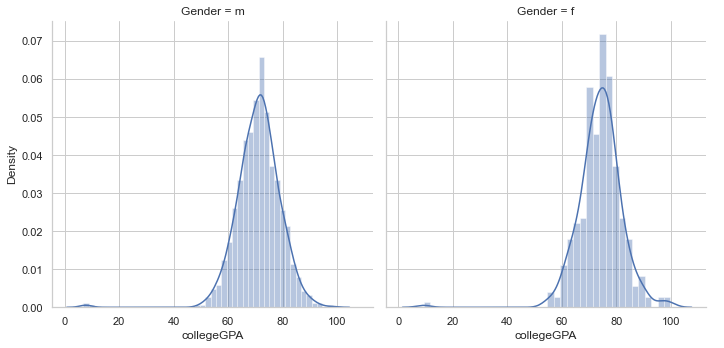

In [101]:
### Now let us check relation with collegegpa
### first check the distribution of gpa 
sns.FacetGrid(data=high_pay,col='Gender',size=5) \
    .map(sns.distplot,'collegeGPA') \
    .add_legend()

* We can see both distribution of college gpa vs male&female are normally distributed with mean around 75%.
* We can see how Similar both male and female distributions are for collegeGPA
* IQR is narrow indication most number of students have similar cgpa in 70-75% region.
* There are some students with CGPA < 20 and CGPA>90

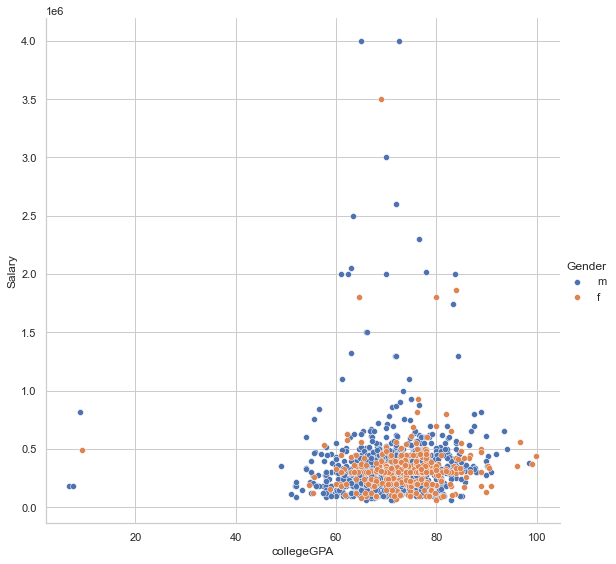

In [102]:
sns.FacetGrid(data=high_pay,hue='Gender',size=8) \
    .map(sns.scatterplot,'collegeGPA','Salary') \
    .add_legend()

* Most of men and women have cgpa around 70-75 which is a good range.
* There is no relation that having high or low gpa being men/women is effecting the salary
* so we can conclude this is not the reason for women being paid less as both distributions overlap extensively.

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

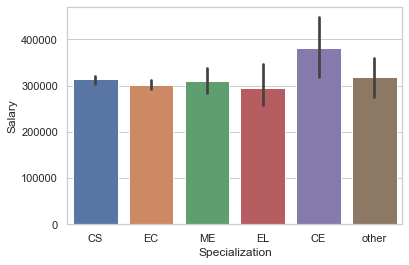

In [104]:
sns.barplot(data=df,x='Specialization',y='Salary')

* Aspirants from CE Branch earns the highest average pay
* All the other branches earn nearly similar average pay

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

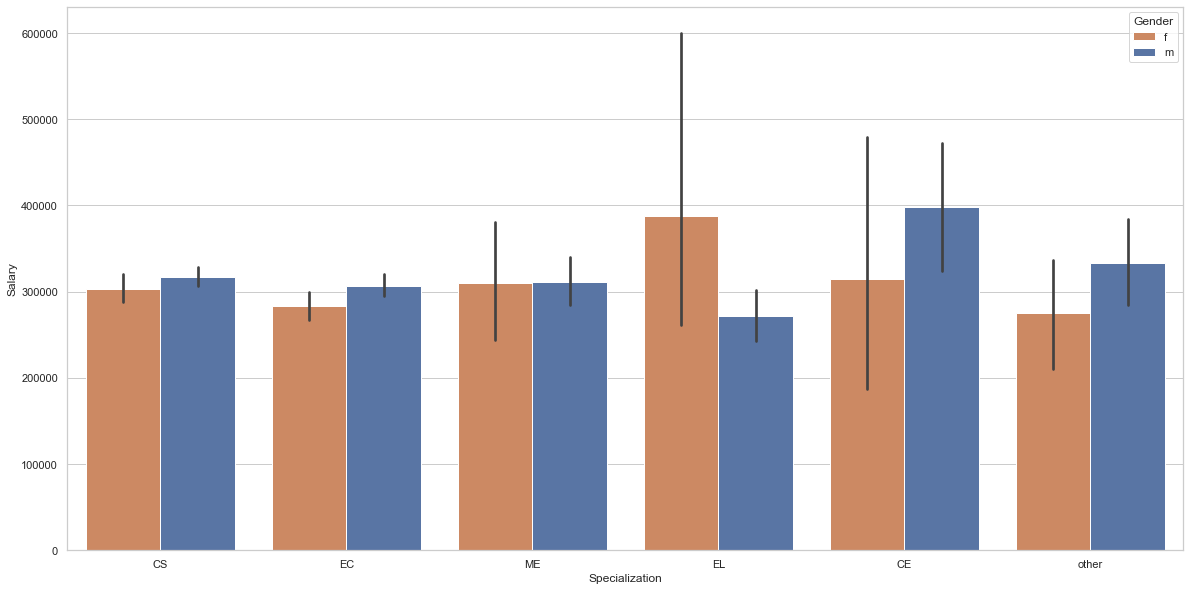

In [105]:
# For the total Dataset
## Checking whether specialization has any effect on salary
plt.figure(figsize=(20,10))
palette = [(0.8666666666666667, 0.5176470588235295, 0.3215686274509804),(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]
sns.barplot(data=df,x='Specialization',y='Salary',hue='Gender',palette=palette)

* Men from CS,EC,CE Earn slightly greater than women from this specialization.
* Women from the EL specialization Earns way more than men from same specialization.

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

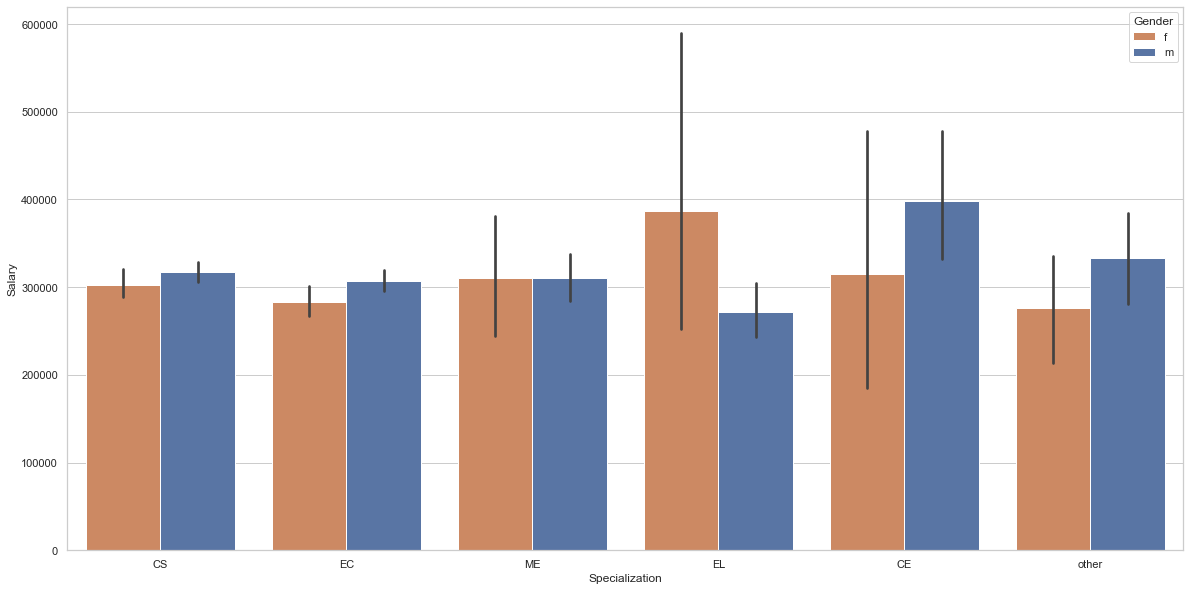

In [107]:
# For the total Dataset
## Checking whether specialization has any effect on salary
plt.figure(figsize=(20,10))
palette = [(0.8666666666666667, 0.5176470588235295, 0.3215686274509804),(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]
sns.barplot(data=df,x='Specialization',y='Salary',hue='Gender',palette=palette)

* Men from CS,EC,CE Earn slightly greater than women from this specialization.
* Women from the EL specialization Earns way more than men from same specialization.

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

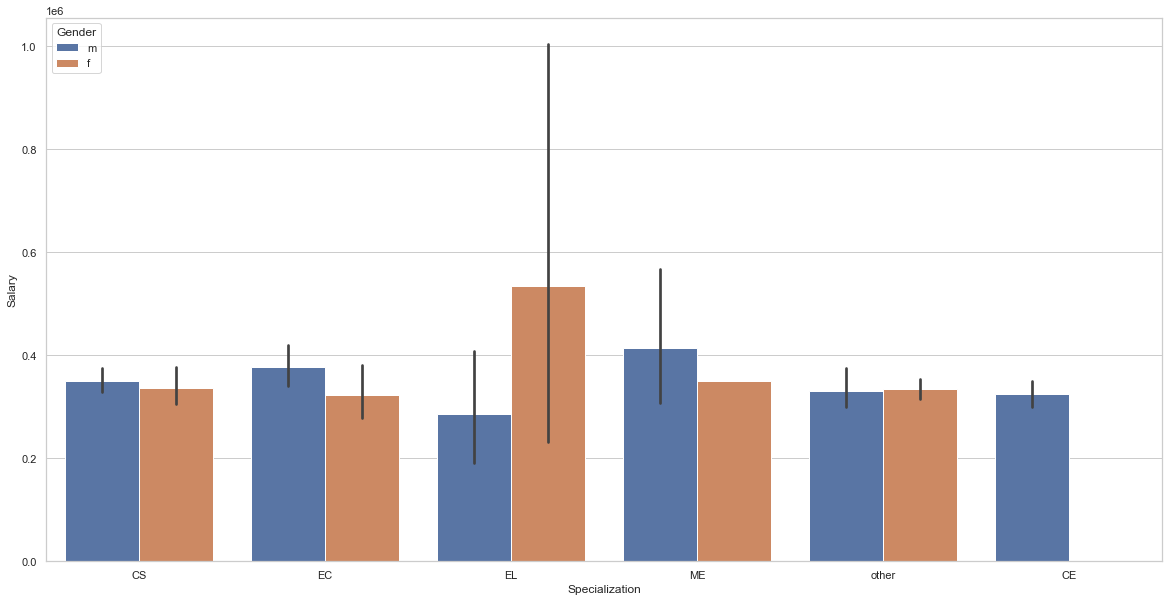

In [108]:
# for the dataset containing Highpaying Jobs
plt.figure(figsize=(20,10))
sns.barplot(data=high_pay,x='Specialization',y='Salary',hue='Gender')

* This is for the people who have higher pays
* From the CE Specialization,Only men are taking up higher pay jobs
* Mostly specialization is not the reason for women being paid less becuase as we say bulk of people are from cs and for cs men and women earn similar

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

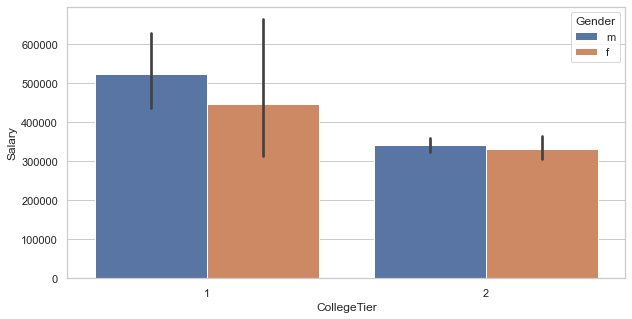

In [110]:
### Lets us check salary with the College Tier
plt.figure(figsize=(10,5))
sns.barplot(data=high_pay,x='CollegeTier',y='Salary',hue='Gender')

In [111]:
high_pay.groupby('CollegeTier').Gender.value_counts()

CollegeTier  Gender
1            m          85
             f          17
2            m         897
             f         287
Name: Gender, dtype: int64

* From the above bar graph,we can see that students from tier1 colleges have higher salary.
* We can see more men are from tier1 colleges than women and overally most students are from tier2 colleges.
* This might be a reason for women being paid less than men in high paying jobs because as most of women are from tier-2 colleges

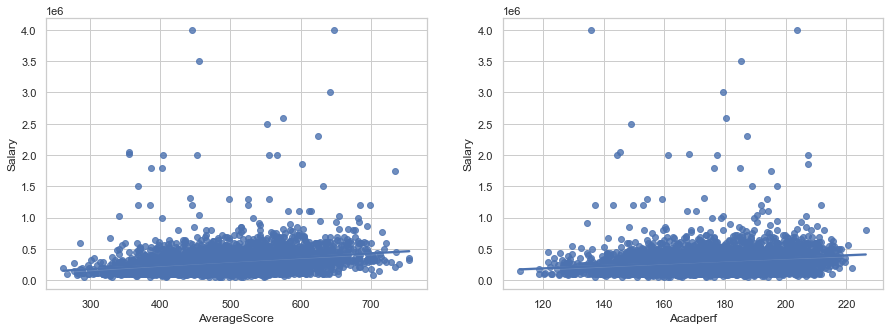

In [114]:
plt.figure(figsize=(15,5))
df['AverageScore'] = (df['Logical'] + df['Quant'] + df['English']) / 3
df['Acadperf'] = df['10percentage'] + df['12percentage'] + df['collegeGPA'] / 3
plt.subplot(1,2,1)
sns.regplot(x='AverageScore',y='Salary',data=df)
plt.subplot(1,2,2)
sns.regplot(x='Acadperf',y='Salary',data=df)
plt.show()

* We can see there is some positive correlation of salary with both the Avgscore and Acadperformance.

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

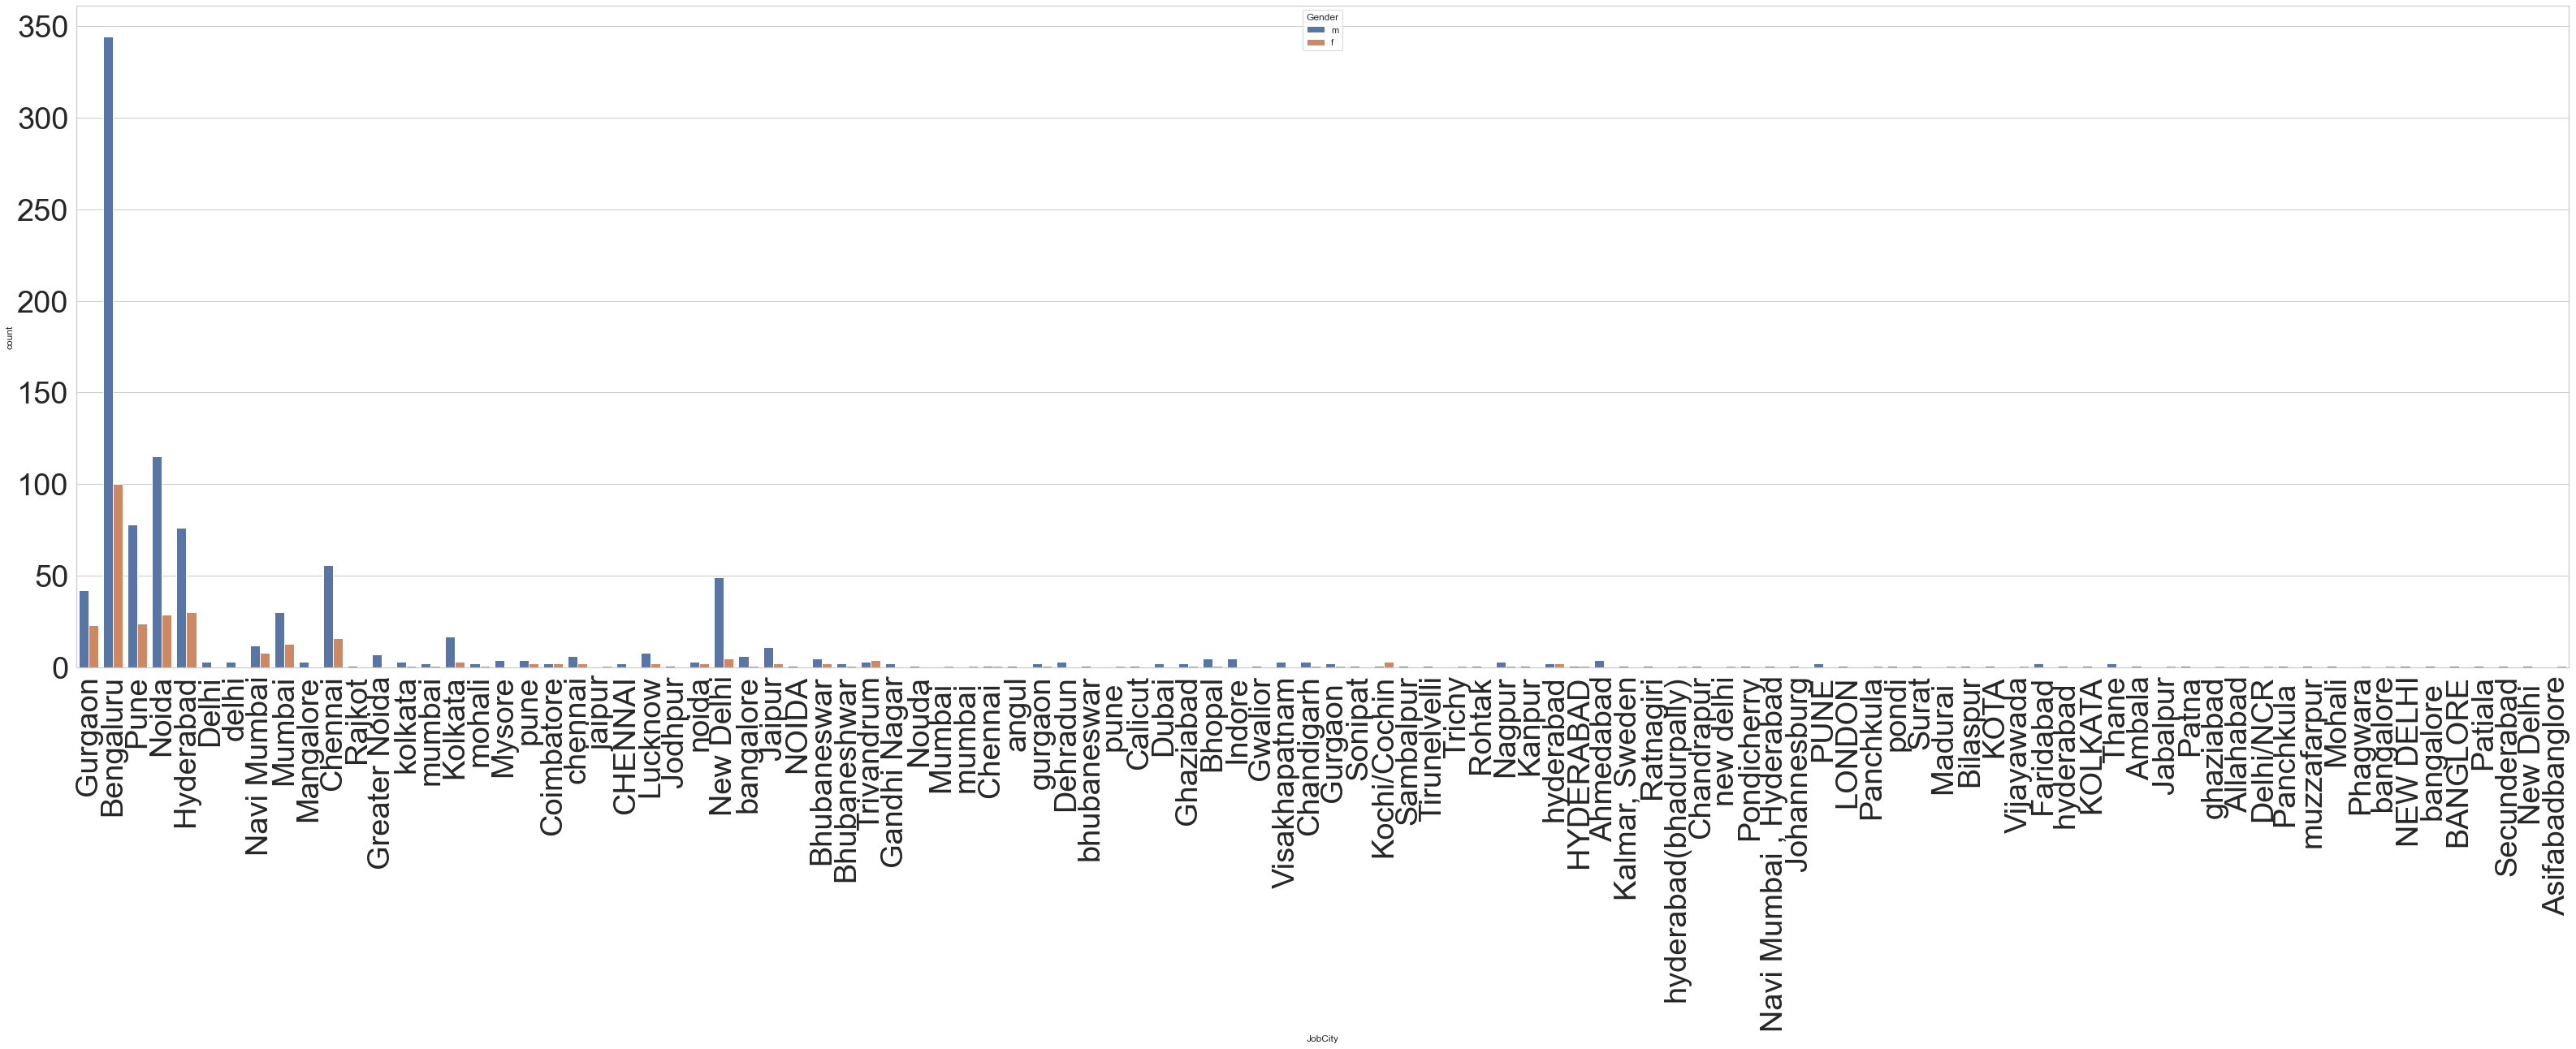

In [115]:
plt.figure(figsize=(55,15))
sns.countplot(x="JobCity",data=high_pay,hue="Gender")
plt.xticks(fontsize=38,rotation=90)
plt.yticks(fontsize=38)

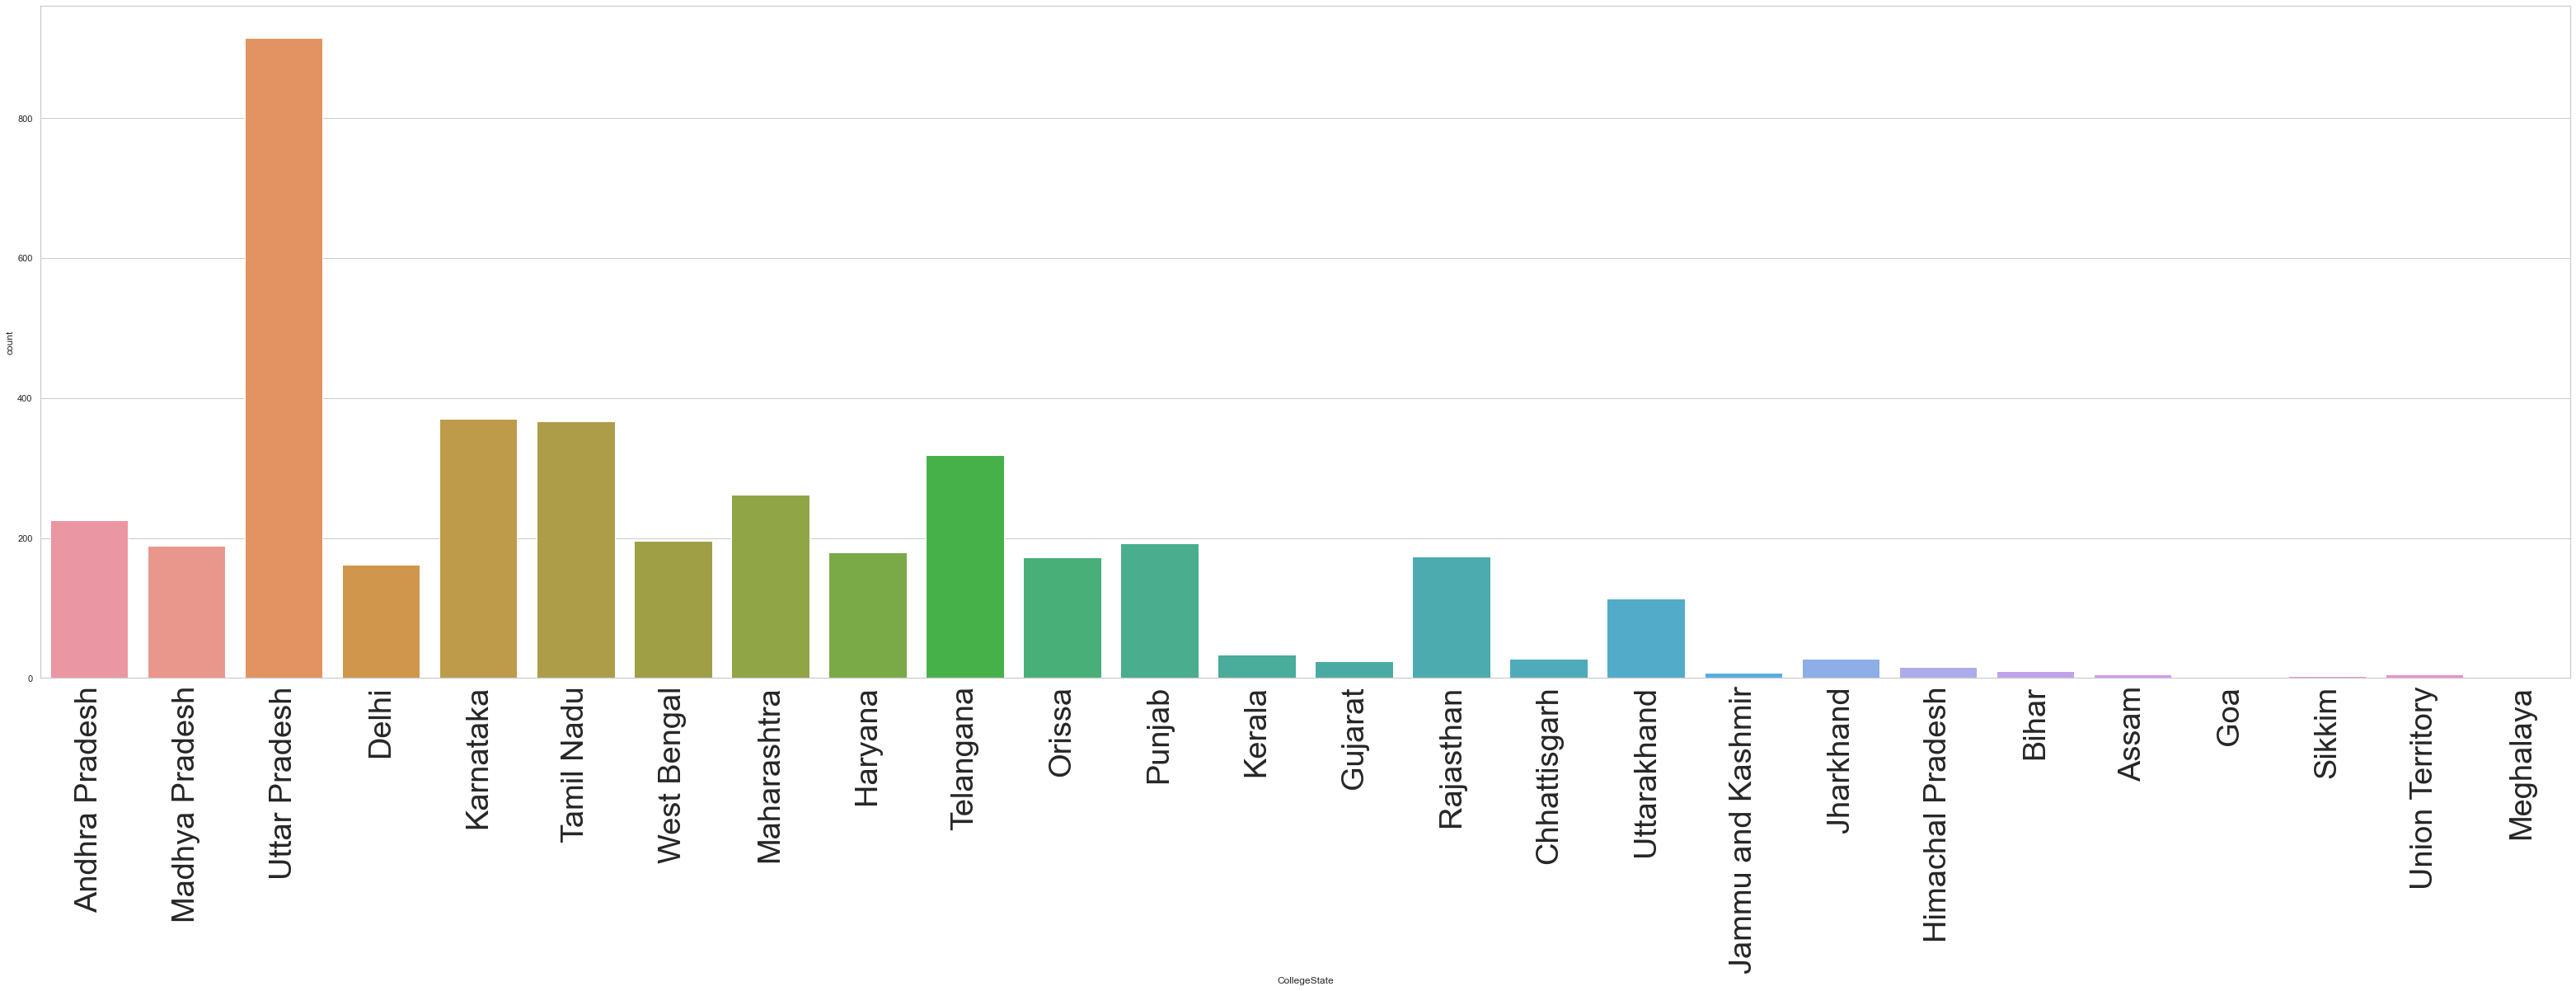

In [117]:
plt.figure(figsize=(55,15))
sns.countplot(data=df, x='CollegeState')
plt.xticks(fontsize=38,rotation=90)
plt.show()

### Overall Conclusions:
#### 1. Most of Amcat Aspirants are male working in IT domain with an experience of around 5years with degree in Btech and specialization in Computer Science/Information Technology from tier-2 college in uttarpradesh with an average salary around 300k.
#### 2. Highpaying jobs taken up by amcat aspirants are mostly from 'IT' Domain.
#### 3. Software Engineer and Software Developer are the most aimed profession for amcat aspirants.

### Let us verify some claims

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

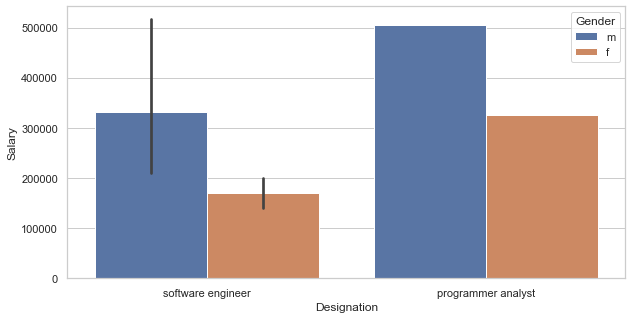

In [122]:
new=df[(df["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (df["Period"]==0)]
plt.figure(figsize=(10,5))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=new)

* For Freshers,the salary is starting from 200k and male are earing more than female as a fresher.

### Let us do a 1 sample T-test to verify the claim
* Null Hypothesis: mu = 250k
* Alternate Hypothesis : mu != 250k

In [124]:
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
pv = st.ttest_1samp(new['Salary'],popmean=250000)[1]
### for a 95% confidence interval,my p- value should be >0.05 to claim the null hypothesis
if pv < 0.05:
    print('We reject the null hypothesis and Average salary is not equal to 250k')
else:
    print('We fail to reject null hypothesis and Avergae salary is equal to 250k')

We fail to reject null hypothesis and Avergae salary is equal to 250k


<AxesSubplot:xlabel='Specialization', ylabel='count'>

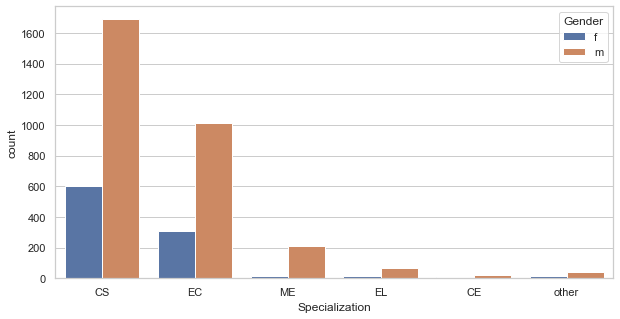

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Specialization',hue='Gender')

* Most of the Amcat Aspirants are from CS&EC specialization. # Let us do a Chi-Square Test to check the relation between Specialization and Gender.
* Null Hypothesis: Gender does not impact specialization
* Alternate Hypothesis : Gender impacts specialization

In [129]:
sample_columns = pd.crosstab(df['Gender'],df['Specialization'],margins=True)
pv = cst(sample_columns)[1]
if pv < 0.05:
    print('We reject the null hypothesis and Gender impacts specialization')
else:
    print('We fail to reject null hypothesis and Gender does not impact specialization')

We reject the null hypothesis and Gender impacts specialization


### So,The above made claims are True!

In [131]:
### Saving my cleaned dataset
df.to_csv("Aspiring_cleaned.csv",index=False)